<div style="display: flex; background-color: #196f3d;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Consumption Requirements of Seattle Building  - P4</h1>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 5px 30px 0px 30px;" >
    <h3 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">| Modeling notebook |</h3>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 30px 30px 0px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Baptiste LEDESERT</h4>
</div>
<div style="display: flex; background-color: #196f3d; margin: auto; padding: 0px 30px 30px 30px;">
    <h4 style="width: 100%; text-align: center; float: left; font-size: 24px;" align="center">Data Scientist course - OpenClassrooms</h4>
</div>

# Prediction et ML

<div style="background-color: #229954;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h2>
</div>

<div style="background-color: #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [478]:
## df_analysis
import io
import sys
import gc
import timeit
import math
import importlib
from math import prod

## General
import pandas as pd
import numpy as np
from numpy import asarray
from numpy.random import seed, randint
import matplotlib.pyplot as plt
import seaborn as sns

## Scikit Learn library
from sklearn.model_selection import train_test_split, ShuffleSplit, permutation_test_score
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate, KFold, GridSearchCV, validation_curve, learning_curve, cross_val_predict, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor, XGBClassifier

%matplotlib inline

sns.set_theme(style="darkgrid")

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h3>
</div>

In [479]:
from functions_BL import df_analysis, plot_validation_curve_by, plot_learning_curve, plot_cross_val_predi, plot_features_importance
importlib.reload(sys.modules['functions_BL'])


<module 'functions_BL' from 'C:\\Users\\blede\\OC\\P4\\functions_BL.py'>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1.3. Constants declaration</h3>
</div>

In [480]:
# enable fonction plot validation curve
enable_pvc_6_1 = False
enable_pvc_6_2 = False
enable_pvc_6_3 = False
enable_pvc_6_4 = False
enable_pvc_6_5 = False
enable_pvc_6_6 = False
enable_pvc_8_4 = False

# enable fonction plot learning curve
enable_plc_6_1 = False
enable_plc_6_2 = False
enable_plc_6_3 = False
enable_plc_6_4 = False
enable_plc_6_5 = False
enable_plc_6_6 = False
enable_plc_8_5 = False

# enable fonction plot cross val predi
enable_pcvp_6_1 = False
enable_pcvp_6_2 = False
enable_pcvp_6_3 = False
enable_pcvp_6_4 = False
enable_pcvp_6_5 = False
enable_pcvp_6_6 = False
enable_pcvp_8_6 = False

# enable fonction plot feature importance
enable_pfi_6_1 = False
enable_pfi_6_2 = False
enable_pfi_6_3 = False
enable_pfi_6_4 = False
enable_pfi_6_5 = False
enable_pfi_6_6 = False
enable_pfi_8_7 = False
enable_pfi_12_4 = False
enable_pfi_12_5 = False

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h2>
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h3>
</div>

<div class="alert alert-block alert-info">
    <p>It is necessary to remember that the following dataset doesn't have any transformation/preprocessing of data.</p>
    <p>So, we have to do the following:</p>
    <ul style="list-style-type: square;">
        <li>Transform features and target to Normal distribution</li>
        <li>Treat missing values</li>
        <li>Standarization of data</li>
    </ul>  
</div>

In [481]:
col_types = {
    'ZipCode': "category",
    'CouncilDistrictCode': "category",
    'Neighborhood': "category",
    'renamed_PropertyType': "category",
    'YearsENERGYSTARCertified': "category"
}
data = pd.read_csv("Cleaned_data.csv", dtype=col_types)
# data = pd.read_csv('Dataset/df_to_work.csv', dtype=col_types)

In [482]:
data.head()

,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,Dist_Harv,renamed_PropertyType
0,98101,7,DOWNTOWN,1.0,12,88434.0,60.0,7226362.00,2003882.00,3946027.0,1276453.0,249.98,89,1568.261110,Hotel
1,98101,7,DOWNTOWN,1.0,11,88502.0,61.0,8387933.00,0.00,3242851.0,5145082.0,295.86,20,1714.763280,Hotel
2,98101,7,DOWNTOWN,1.0,41,759392.0,43.0,72587018.00,21566554.00,49526664.0,1493800.0,2089.28,47,1423.556191,Hotel
3,98101,7,DOWNTOWN,1.0,10,61320.0,56.0,6794583.25,2214446.25,2768924.0,1811213.0,286.43,90,1490.740477,Hotel
4,98121,7,DOWNTOWN,1.0,18,113580.0,75.0,14172605.00,0.00,5368607.0,8803998.0,505.01,36,1316.309280,Hotel


In [483]:
df_analysis(data, "data", type_analysis="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  1520 rows and 15 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 139.5 KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ZipCode,category,1520,49,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CouncilDistrictCode,category,1520,7,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neighborhood,category,1520,13,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NumberofBuildings,float64,1520,14,0,0.00000,1.14342,1.00000,1.00000,1.00000,1.00000,27.00000,1.19102
4,NumberofFloors,int64,1520,44,0,0.00000,4.31118,1.00000,1.00000,2.00000,4.00000,99.00000,6.82895
5,PropertyGFABuilding(s),float64,1520,1441,0,0.00000,101544.36572,5000.00000,28008.50000,46141.50000,96265.50000,2200000.00000,175330.61564
6,ENERGYSTARScore,float64,1520,101,0,0.00000,41.26579,0.00000,0.00000,41.00000,79.00000,100.00000,38.20850
7,SiteEnergyUse(kBtu),float64,1520,1520,0,0.00000,8298288.73835,57133.00000,1253389.75000,2719050.50000,7277572.25000,448385283.00000,22416937.50287
8,SteamUse(kBtu),float64,1520,109,0,0.00000,491522.47999,0.00000,0.00000,0.00000,0.00000,134943456.00000,5339714.83789
9,Electricity(kBtu),float64,1520,1519,0,0.00000,5741296.05424,0.00000,735117.50000,1748791.50000,5264935.25000,274532495.00000,13830969.69907


<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2.2. Intergrate calculated ratios</h3>
</div>

In [484]:
import inspect
def plus_ind(df__from, use_for='mod'):
    df__to = df__from.copy()
    df__to['GFABuilding_mean'] = (round((df__to['PropertyGFABuilding(s)'].fillna(0)/df__to['NumberofBuildings'].fillna(0)),5))
    df__to['GFAFloor_mean'] = (round((df__to['PropertyGFABuilding(s)'].fillna(0)/df__to['NumberofFloors'].fillna(0)/df__to['NumberofBuildings'].fillna(0)),5))
    # df__to['SiteEnergyUseBuild_Ratio'] = (round((df__to['SiteEnergyUse(kBtu)'].fillna(0)/df__to['PropertyGFABuilding(s)'].fillna(0)),5))
    
    h=9
    df__to['ExtsurfVol_Ratio'] = round((4*h+1)*1/h*np.sqrt(df__to['PropertyGFABuilding(s)'].fillna(0)/(df__to['GFAFloor_mean'].fillna(0))),5)
    df__to['SteamUse_Ratio'] = (round((df__to['SteamUse(kBtu)'].fillna(0)/df__to['SiteEnergyUse(kBtu)'].fillna(0)),5))
    df__to['Electricity_Ratio'] = (round((df__to['Electricity(kBtu)'].fillna(0)/df__to['SiteEnergyUse(kBtu)'].fillna(0)),5))
    df__to['NaturalGas_Ratio'] = (round((df__to['NaturalGas(kBtu)'].fillna(0)/df__to['SiteEnergyUse(kBtu)'].fillna(0)),5)) 

    # print (df__to.columns)
    # Create a new variable with the DataFrame name and '_ind' suffix in the global namespace
    # Get the name of the original DataFrame
    calling_frame = inspect.currentframe().f_back
    frame_locals = calling_frame.f_locals
    df_name = [name for name, var in frame_locals.items() if var is df__from][0]

    # global global_name
    # global_name = f"{df_name}_ind"
    
    globals()[f"{df_name}_ind"] = df__to.copy()
    # globals()[global_name] = df__to.copy() # pb dans la declaration de la variable... a moifier. ne se cree pas
    # print("data_manu")
    # globals()["creat_data_ind"]= df__to.copy()
    
    # print("data_manu2")
    # global data_manu2
    # data_manu2 = df__to.copy()
    

In [485]:
plus_ind(data,use_for='mod')
df_analysis(data_ind, "data w calculated indicators", type_analysis="complete")


Analysis of data w calculated indicators dataset
--------------------------------------------------------------------
- Dataset shape:                  1520 rows and 21 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 210.7 KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,ZipCode,category,1520,49,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,TotalGHGEmissions,float64,1520,1463,0,0.00000,187.66162,0.40000,20.59500,50.01500,147.03500,16870.98000,733.82079
19,Electricity_Ratio,float64,1520,1129,0,0.00000,0.70269,0.00000,0.49138,0.71054,1.00000,1.00000,0.26302
18,SteamUse_Ratio,float64,1520,109,0,0.00000,0.02224,0.00000,0.00000,0.00000,0.00000,0.76699,0.09405
17,ExtsurfVol_Ratio,float64,1520,48,0,0.00000,7.70924,4.11111,4.11111,7.12065,9.19272,40.90504,4.47895
16,GFAFloor_mean,float64,1520,1473,0,0.00000,30779.85360,221.69697,11799.37500,20032.25000,31339.00000,1100000.00000,53474.63582
15,GFABuilding_mean,float64,1520,1442,0,0.00000,95306.67653,4300.00000,27465.00000,45000.00000,92240.75000,2200000.00000,163609.02737
14,renamed_PropertyType,category,1520,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Dist_Harv,float64,1520,1455,0,0.00000,4761.67319,151.27622,2229.06534,3994.51338,6824.43477,14168.51809,3187.45438
12,BuildingAge,int64,1520,113,0,0.00000,54.34342,1.00000,28.00000,50.00000,86.00000,116.00000,32.76491


In [486]:
data_ind = data_ind.drop(columns=['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'])

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">3. Splitting data - SiteEnergyUse(kBtu)</h2>
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.1. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [487]:
X = data_ind.drop(columns=["SiteEnergyUse(kBtu)", "TotalGHGEmissions", "ENERGYSTARScore"])

In [488]:
X.head()

,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),BuildingAge,Dist_Harv,renamed_PropertyType,GFABuilding_mean,GFAFloor_mean,ExtsurfVol_Ratio,SteamUse_Ratio,Electricity_Ratio,NaturalGas_Ratio
0,98101,7,DOWNTOWN,1.0,12,88434.0,89,1568.261110,Hotel,88434.0,7369.50000,14.24131,0.27730,0.54606,0.17664
1,98101,7,DOWNTOWN,1.0,11,88502.0,20,1714.763280,Hotel,88502.0,8045.63636,13.63501,0.00000,0.38661,0.61339
2,98101,7,DOWNTOWN,1.0,41,759392.0,47,1423.556191,Hotel,759392.0,18521.75610,26.32396,0.29711,0.68231,0.02058
3,98101,7,DOWNTOWN,1.0,10,61320.0,90,1490.740477,Hotel,61320.0,6132.00000,13.00047,0.32591,0.40752,0.26657
4,98121,7,DOWNTOWN,1.0,18,113580.0,36,1316.309280,Hotel,113580.0,6310.00000,17.44197,0.00000,0.37880,0.62120


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [489]:
y_energy = np.log2(data_ind.loc[:,"SiteEnergyUse(kBtu)"])
y_energy.head()

0    22.784838
1    22.999884
2    26.113208
3    22.695954
4    23.756602
Name: SiteEnergyUse(kBtu), dtype: float64

In [490]:
y_energy_values = y_energy.values
y_energy_values[:5]

array([22.7848381 , 22.99988391, 26.11320821, 22.69595363, 23.75660162])

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3.2. Train/Test split</h3>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>SiteEnergyUse(kBtu)</b>
</div>

In [491]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.2, random_state=42)

In [492]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("---------------------")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (1216, 15)
y_train: (1216,)
---------------------
X_test: (304, 15)
y_test: (304,)


<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">4. Data preprocessing</h2>
</div>

<div class="alert alert-block alert-info">
     We are going to process the features as follows<br><br>
    <p><b>Boolean features</b><br>
    Transforming them into int</p>
    <p><b>Categorical features</b><br>
    Transforming all features through LabelEncoder</p>
    <p><b>Ordinal features</b><br>
    Transforming the feature through OrdinalEncoder</p>
    <p><b>Features to Log</b><br>
    Based on the Exploratory Data Analysis, we detected the features that can be transformed into log2 to achieve a better normal distribution </p>
    <p><b>Numerical features</b><br>
    Normalizing the features through StandardScaler due to all of them do not have a normal distribution</p>
</div>

In [493]:
def boolean_transformation(X):
    # Transforming the boolean features into int
    return X.astype(int)

def log_transformation(X):
    # transforming some features into log2
    return np.log2(X + 1)

In [494]:
# BOOLEAN_FEATURES = [] # Features to be transformed into int
CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType", 'CouncilDistrictCode'] #'ZipCode', # Features to be transformed with OneHotEncoder()
# ORDINAL_FEATURES = []
FEATURES_TO_LOG = ['GFAFloor_mean', 'GFABuilding_mean', "PropertyGFABuilding(s)"] # Features to be transformed into log2

# Features to be treated considering numerical values
NUMERICAL_FEATURES = ["NumberofFloors", "NumberofBuildings", "BuildingAge", 'Dist_Harv','Electricity_Ratio', 'SteamUse_Ratio', 'NaturalGas_Ratio', 'ExtsurfVol_Ratio',  ] 


In [495]:
# boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

categorical_pipeline = make_pipeline(OneHotEncoder(sparse_output=False, drop="first", handle_unknown='ignore'))

# ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[["Small", "Medium", "Large"]]))

log_transformation_pipeline = make_pipeline(KNNImputer(), FunctionTransformer(log_transformation))

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

In [496]:
preprocessor = make_column_transformer(
                (categorical_pipeline, CATEGORICAL_FEATURES),
                (log_transformation_pipeline, FEATURES_TO_LOG), 
                (numerical_pipeline, NUMERICAL_FEATURES),
                # remainder="passthrough"
)

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">5. Modelisation</h2>
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.1. Supervised models</h3>
</div>

<div class="alert alert-block alert-info">
    List of models to use. for now, in default mode
</div>

In [497]:
regressors = {
    "Linear" : LinearRegression(),
    "KNeighbors" : KNeighborsRegressor(n_neighbors=2),
    "Lasso" : Lasso(),
    "SVR" : SVR(),
    "Random Forest" : RandomForestRegressor(),
    "XGBoost" : XGBRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor()
}

<div class="alert alert-block alert-info">
    Models metrics
</div>

In [498]:
# Dataframe with y_test_transformed to compared againts predictions
df_y_pred = pd.DataFrame({
        "Model" : "Original",
        "y_pred" : y_test
})

# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION  = ([] for i in range(5))

for k, v in regressors.items():
    # print(v)
    start_time_model = timeit.default_timer()
    
    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    # Fit the model using the training data and training target
    reg.fit(X_train, y_train)
    
    # Making the prediction using the testing data
    y_pred = reg.predict(X_test)
    
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    # Concatenating predictions to compare against y_test_transformed
    df_temp = pd.DataFrame({
        "Model" : k,
        "y_pred" : y_pred
    })
    
    # Concatenating predictions to compare against y_test_transformed
    df_y_pred = pd.concat([df_y_pred, df_temp])
    
    # Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
    R2SCORE = round(1 - r2_score(y_test, y_pred), 3)
    
    # Calculating the Mean absolute error (The best value is 0.0)
    MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
    # Calculating Root Mean Square Error for each model (The best value is 0.0)
    RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_R2SCORE.append(R2SCORE)
    LIST_MAE.append(MAE)
    LIST_RMSE.append(RMSE)
    LIST_DURATION.append(end_time_model)

<div class="alert alert-block alert-info">
    Comparison of energy predictions against original data
</div>

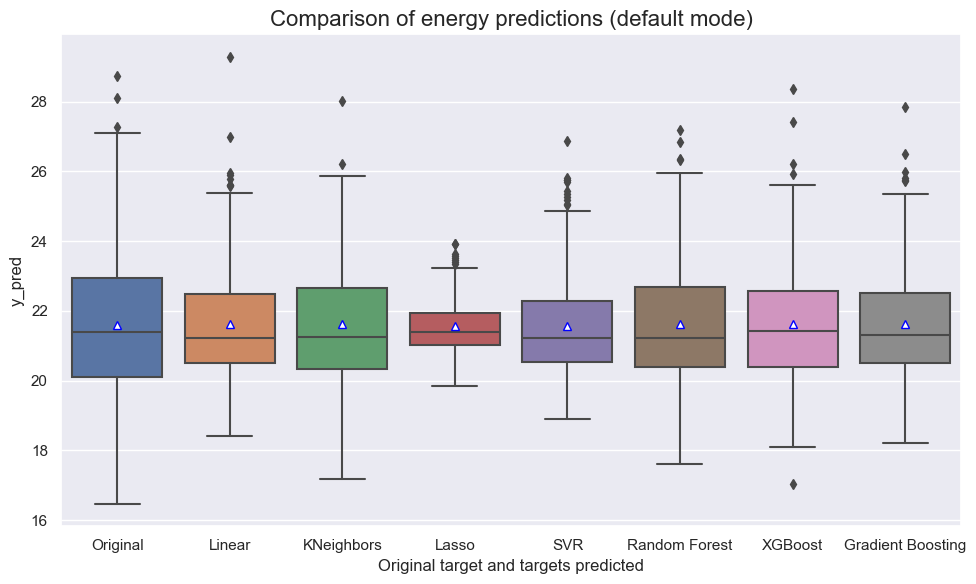

In [499]:
plt.figure(figsize=[10,6])
sns.boxplot(x=df_y_pred["Model"], y=df_y_pred["y_pred"], showmeans=True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title("Comparison of energy predictions (default mode)", size=16)
plt.xlabel("Original target and targets predicted", size=12)
plt.tight_layout()
plt.savefig("img/Comparison-of-imputations.png")
plt.show()

<div class="alert alert-block alert-success">    
    <p><b>Observations / Conclusions</b></p>    
    <p>At this point, we can see that <b>Kneighbors</b>, <b>Random Forest</b> and <b>Gradient Boosting</b> are the most <b>similar to Original data</b></p>
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.2. Predictions metrics</h3>
</div>

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [500]:
df_models_metrics = pd.DataFrame({
    "Model" : LIST_MODEL,
    "1 - " + "R2".translate(SUP) : LIST_R2SCORE, 
    "MAE" : LIST_MAE,    
    "RMSE" : LIST_RMSE,
    "Duration" : LIST_DURATION,
})

df_models_metrics

,Model,1 - R²,MAE,RMSE,Duration
0,Linear,0.313,0.874,1.164,0.018
1,KNeighbors,0.451,1.047,1.398,0.021
2,Lasso,0.619,1.305,1.638,0.015
3,SVR,0.378,0.952,1.279,0.110
4,Random Forest,0.305,0.877,1.150,2.428
5,XGBoost,0.326,0.915,1.189,0.168
6,Gradient Boosting,0.306,0.882,1.152,0.673


<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
        <b>Best results</b> with default mode considering each model
    <ul style="list-style-type: square;">
        <li><b>1-R2:</b> Gradient Boosting(0.323) </li>
        <li><b>MAE:</b> Gradient Boosting(0.787) </li>
        <li><b>RMSE:</b> Gradient Boosting(1.044) </li>
        <li><b>Duration:</b> Lasso(0.076) </li>
    </ul>
</div>

In [501]:
df_models_metrics_melt = pd.melt(df_models_metrics, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_melt.head(7)

,Model,Metric,Value
0,Linear,1 - R²,0.313
1,KNeighbors,1 - R²,0.451
2,Lasso,1 - R²,0.619
3,SVR,1 - R²,0.378
4,Random Forest,1 - R²,0.305
5,XGBoost,1 - R²,0.326
6,Gradient Boosting,1 - R²,0.306


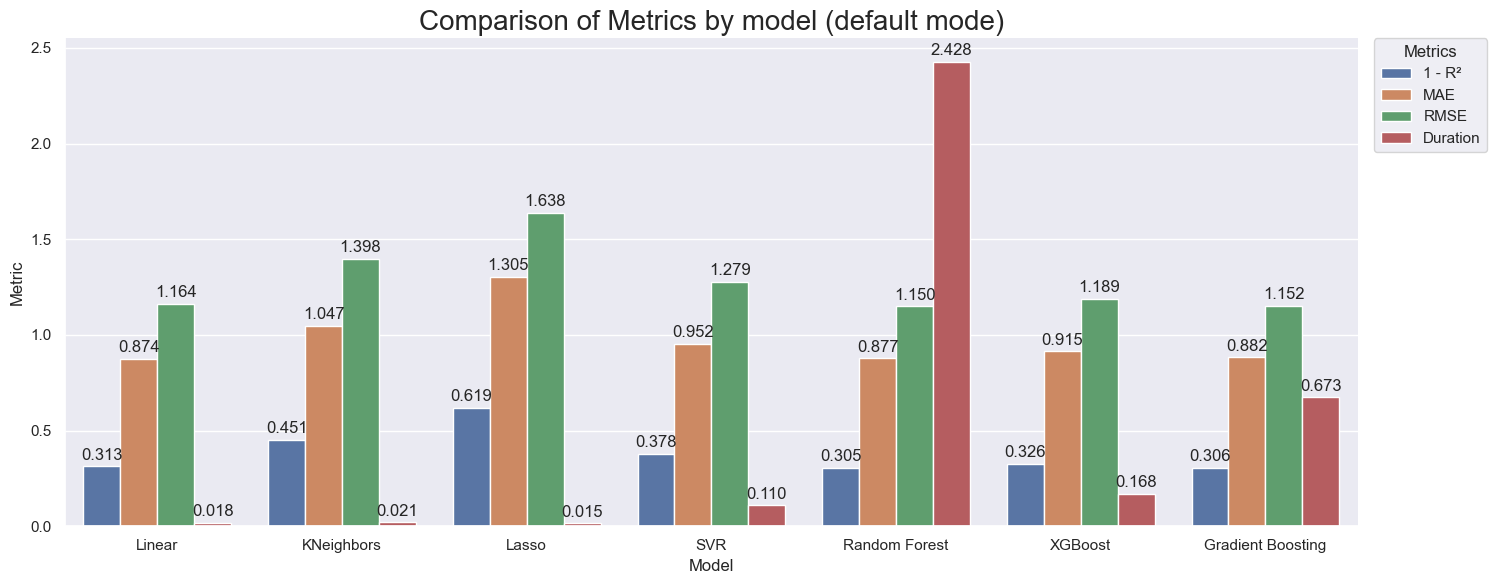

In [502]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
        So far, <b>Gradient Boosting</b> is giving the best result with <b>default parameters</b>
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5.3. Cross Validation K-Fold</h3>
</div>

In [503]:
# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION, LIST_SCORES  = ([] for i in range(6))

for k, v in regressors.items():

    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    kfold = KFold(n_splits=5, shuffle=False, random_state=None)
    
    # Get the score for each validation score method to get accuracy of model
    scores = cross_validate(reg, X_train, y_train, cv=kfold, scoring=("r2", "neg_mean_absolute_error", "neg_mean_squared_error"), return_train_score=True)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_R2SCORE.append(round((1 - scores.get("test_r2").mean()), 3))
    LIST_MAE.append(round(abs(scores.get("test_neg_mean_absolute_error").mean()), 3))
    LIST_RMSE.append(round(math.sqrt((abs(scores.get("test_neg_mean_squared_error").mean()))), 3))
    LIST_DURATION.append(round(scores.get("fit_time").mean(), 3))
    LIST_SCORES.append(scores.get("test_r2"))

<div class="alert alert-block alert-info">
    Plotting the cross validation executions
</div>

In [504]:
df_cross_val = pd.DataFrame(LIST_SCORES, columns=[1, 2, 3, 4, 5])
df_cross_val["Model"] = LIST_MODEL
df_cross_val_melt = df_cross_val.melt(id_vars="Model", var_name="Execution", value_name="Score")

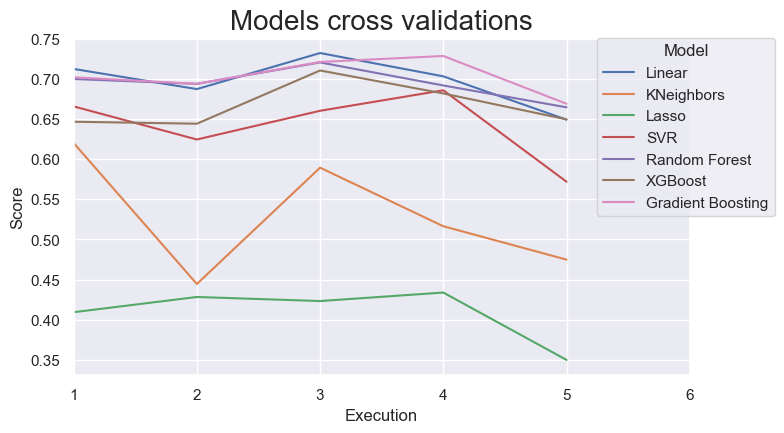

In [505]:
plt.figure(figsize=(8, 6))
plot = sns.lineplot(x="Execution",
                    y="Score",
                    hue="Model",
                    data=df_cross_val_melt
)
plt.legend(bbox_to_anchor=(0.85, 1), borderaxespad=0, title="Model")
plt.tight_layout()
plt.title("Models cross validations", size=20)
plot.set(xlabel="Execution", ylabel="Score", xlim=(1, 6))

plt.savefig("img/models-cross-validations-Scores.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
        At this point, we can see:
    <ul style="list-style-type: square;">
        <li><b>Gradient Boosting</b> is the best result </li>
        <li><b>Lasso</b> is the worst result </li>
    </ul>
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.3.1 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [506]:
df_models_metrics_cross = pd.DataFrame({
    "Model" : LIST_MODEL,
    "1 - "+"R2".translate(SUP) : LIST_R2SCORE, 
    "MAE" : LIST_MAE,    
    "RMSE" : LIST_RMSE,
    "Duration" : LIST_DURATION,
})

df_models_metrics_cross

,Model,1 - R²,MAE,RMSE,Duration
0,Linear,0.303,0.772,1.007,0.013
1,KNeighbors,0.471,0.940,1.251,0.009
2,Lasso,0.591,1.106,1.406,0.010
3,SVR,0.359,0.820,1.095,0.043
4,Random Forest,0.306,0.770,1.011,1.815
5,XGBoost,0.334,0.803,1.054,0.125
6,Gradient Boosting,0.297,0.765,0.996,0.535


<div class="alert alert-block alert-success">
    <b>Best results</b> with Cross-Validation considering each model
    <ul style="list-style-type: square;">
        <li><b>1-R2:</b> XGBoost(0.007) </li>
        <li><b>MAE:</b> XGBoost(0.086) </li>
        <li><b>RMSE:</b> XGBoost(0.150) </li>
        <li><b>Duration:</b> Linear(0.010) </li>
    </ul> 
</div>

In [507]:
df_models_metrics_melt_cross = pd.melt(df_models_metrics_cross, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_melt_cross.head(7)

,Model,Metric,Value
0,Linear,1 - R²,0.303
1,KNeighbors,1 - R²,0.471
2,Lasso,1 - R²,0.591
3,SVR,1 - R²,0.359
4,Random Forest,1 - R²,0.306
5,XGBoost,1 - R²,0.334
6,Gradient Boosting,1 - R²,0.297


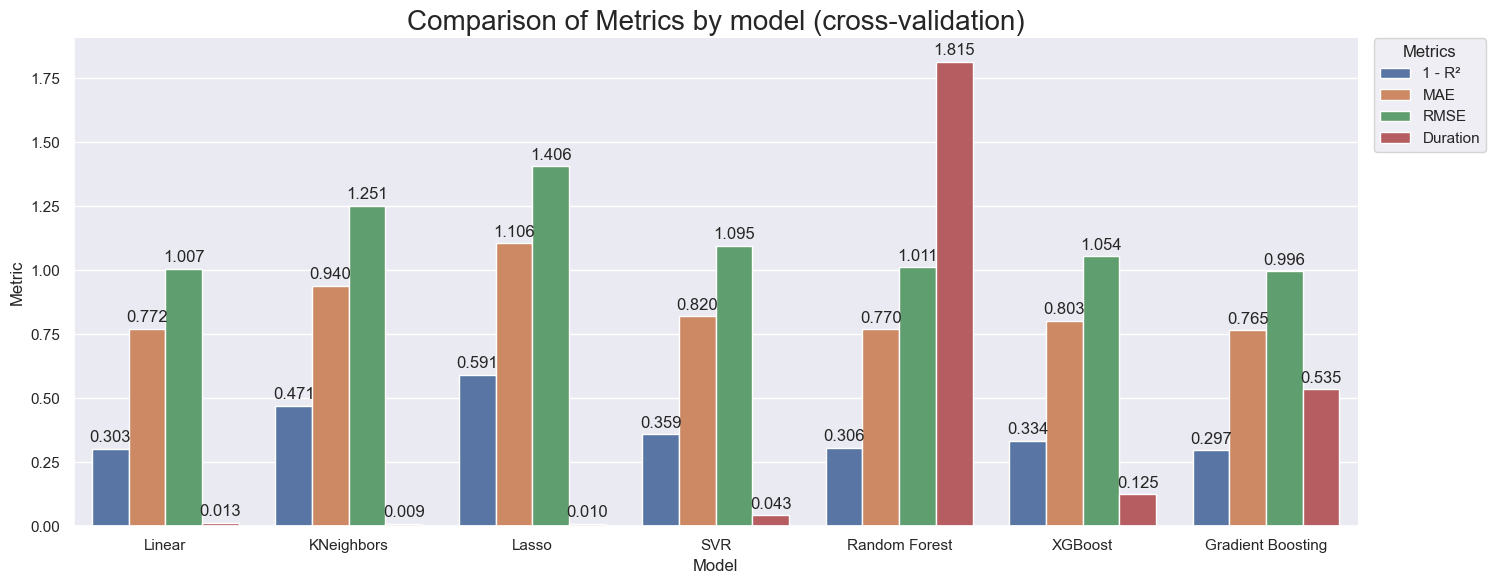

In [508]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt_cross, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (cross-validation)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetrics_crossByModel.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>Some results improved their values</li>
        <li>Despite the decrease of his result, <b>Gradient Boosting</b> is still giving the best result with <b>default parameters</b> and <b>cross-validation</b></li>
    </ul>
</div>

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">6. Optimization</h2>
</div>

<div class="alert alert-block alert-info">
    We are going to optimize each model separately, to see the results more in detail<br>
    Also, we are going to add all predictions and metrics base on parameters optimization to compare the results
</div>

In [509]:
# Dataframe for metrics to compare
df_models_metrics_gsc = pd.DataFrame({})

# Dataframe with final results for each models withs theirs best parameters
df_models_hyperparameters = pd.DataFrame({})

# Dataframe with y_test_transformed to compared againts predictions
df_y_pred_hyperparameters = pd.DataFrame({
        "Model" : "Original",
        "y_pred" : y_test
})

# List of metrics results for each models 
LIST_MODEL_GSC, LIST_R2SCORE_GSC, LIST_MAE_GSC, LIST_RMSE_GSC, LIST_DURATION_GSC, LIST_SCORES_GSC  = ([] for i in range(6))

<div class="alert alert-block alert-info">
    At the same time, we are going to get the following metrics
</div>

In [510]:
SCORINGS = {
    "R2" : "r2",
    "MSE" : "neg_mean_squared_error", 
    "MAE" : "neg_mean_absolute_error"
}

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.1. Linear Regression optimization</h3>
</div>

<div class="alert alert-block alert-info">
    <p>It is necessary to take in account that we are treating with <b>Non-linear Dataset</b> based on EDA done</p>
    <p><b>Initializing model</b></p>
</div>

In [511]:
lr = LinearRegression()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [512]:
reg_lr = make_pipeline(preprocessor, lr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [513]:
sorted(reg_lr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings 
</div>

In [514]:
param_grid = {
    "linearregression__copy_X" : [True, False], # If True, X will be copied; else, it may be overwritten.
    "linearregression__fit_intercept" : [True, False] # Whether to calculate the intercept for this model. 
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [515]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(reg_lr, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.311
- MAE: 0.777
- RMSE: 1.015
- Duration: 0.01
- Parameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [516]:
df_temp = pd.DataFrame({
    "Model" : ["LinearRegression"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [517]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [518]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.311,0.777,1.015,0.01


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.1. Linear Regression Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [519]:
# kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg_lr_best = make_pipeline(preprocessor, LinearRegression(copy_X=search.best_params_.get("linearregression__copy_X"),
                                                           fit_intercept=search.best_params_.get("linearregression__fit_intercept")
                                                          )
                           )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [520]:
plot_learning_curve(reg_lr_best, "LinearRegression", X_train, y_train, cv=kfold, enable=enable_plc_6_1)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>We can see as the training example increase, the R2 improves.</li>
    </ul>
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.2. Linear Regression predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [521]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, LinearRegression(copy_X=search.best_params_.get("linearregression__copy_X"), 
#                                                    fit_intercept=search.best_params_.get("linearregression__fit_intercept")
#                                                   )
#                    )

reg_lr_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_lr = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [522]:
# Making the prediction using the testing data
plot_cross_val_predi(reg_lr_best, "LinearRegresion", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_1)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>In the Cross-Values Predictions we can compare in details the real values vs predicted values. <br>In this one, it is easy to see some correlation between the model's predictions and its actual results.</li>
        <li>On Residuals, we get positive values (on the y-axis) that mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.</li>
    </ul>
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.3. Linear Regression Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [523]:
# reg = make_pipeline(preprocessor, LinearRegression(copy_X=search.best_params_.get("linearregression__copy_X"), 
#                                                    fit_intercept=search.best_params_.get("linearregression__fit_intercept")
#                                                   )
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [524]:
plot_features_importance(reg_lr_best, "LinearRegresion", X_train, y_train, scoring="r2", enable=enable_pfi_6_1)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.4. Polynomial Features</h4>
</div>

<div class="alert alert-block alert-info">
    <p>we are going to work with a <b>Polynomial Features</b> to make a model more complex</p>
    <p>Initializing model</p>
</div>

In [525]:
poly = PolynomialFeatures()

lr = LinearRegression()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [526]:
poly_reg = make_pipeline(preprocessor, poly, lr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [527]:
sorted(poly_reg.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings 
</div>

In [528]:
param_grid = {
    "polynomialfeatures__degree" : [1, 2, 3, 4],
    "linearregression__copy_X" : [True, False],
    "linearregression__fit_intercept" : [True, False]
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [529]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(poly_reg, param_grid, n_jobs=-2, verbose=1, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3)) 
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Metrics based on the best R²
- 1 - R²: 0.311
- MAE: 0.777
- RMSE: 1.015
- Duration: 0.01
- Parameters: {'linearregression__copy_X': True, 'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 1}


<div class="alert alert-block alert-info">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.1. Linear Regression and Polynomial Features Validation curve</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [530]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

degree = [1, 2, 3, 4, 5]

reg_deg = make_pipeline(preprocessor, PolynomialFeatures(), 
                        LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"), copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [531]:
plot_validation_curve_by(reg_deg, "LinearRegression - Polynomial", "R2SCORE", X_train, y_train, param_name="polynomialfeatures__degree", param_range=degree, param_name_short="Degree", cv=kfold, enable=enable_pvc_6_1)

<div class="alert alert-block alert-warning">
    It is necessary to remenber that we are treating with Non-linear Dataset. 
</div>

<div style="background-color:  #52be80;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.2. Linear Regression and Polynomial Features Learning curve</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [532]:
# kfold = KFold(n_splits=5, shuffle=False, random_state=None)

poly_reg_best = make_pipeline(preprocessor, PolynomialFeatures(degree=search.best_params_.get("linearregression__copy_X")),
                              LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
                                               copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [533]:
plot_learning_curve(poly_reg_best, "LinearRegression - Polynomial", X_train, y_train, cv=kfold, enable=enable_plc_6_1)

<div style="background-color:  #52be80;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.3. Linear Regression and Polynomial Features predictions validations</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [534]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, PolynomialFeatures(degree=search.best_params_.get("linearregression__copy_X")), 
#                     LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
#                                      copy_X=search.best_params_.get("linearregression__copy_X"))
#                    )

poly_reg_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = poly_reg_best.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [535]:
# Making the prediction using the testing data
plot_cross_val_predi(poly_reg_best, "LinearRegression - Polynomial", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_1)

<div style="background-color:  #52be80;" >
    <h5 style="margin: auto; padding: 20px; color:#fff; ">6.1.4.4. Linear Regression and Polynomial Features Features Importance</h5>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [536]:
# reg = make_pipeline(preprocessor, PolynomialFeatures(degree=search.best_params_.get("linearregression__copy_X")), 
#                     LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
#                                      copy_X=search.best_params_.get("linearregression__copy_X"))
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [537]:
plot_features_importance(poly_reg_best, "LinearRegression - Polynomial", X_train, y_train, scoring="r2", enable=enable_pfi_6_1)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.1.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    <p>To make the comparison among predictions metrics, we are going to select the Linear Regresion without the transformation through Polynomial Features.</p>
    <p>At the same time, we are going to make the prediction with the testing set to compare the result with the model in default mode</p>
</div>

In [538]:
start_time_model = timeit.default_timer()

reg_wo_poly = make_pipeline(preprocessor, LinearRegression(fit_intercept=search.best_params_.get("linearregression__fit_intercept"),
                                                   copy_X=search.best_params_.get("linearregression__copy_X"))
                   )

reg_wo_poly.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_wo_poly = reg_wo_poly.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [539]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "LinearRegression",
    "y_pred" : y_pred_wo_poly
})

In [540]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [541]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [542]:
df_temp = pd.DataFrame({
    "Model" : ["LinearRegression"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [543]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [544]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.31277,0.874,1.164,0.019


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result (for Linear Regression) is very similar
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.2. KNeighbors optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [545]:
knn = KNeighborsRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [546]:
reg_knn = make_pipeline(preprocessor, knn)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [547]:
sorted(reg_knn.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [548]:
param_grid = {
    "kneighborsregressor__n_neighbors" : [3, 5, 7, 9, 11, 13, 15, 20, 50], # Number of neighbors to use by default for kneighbors queries.
    "kneighborsregressor__metric" : ["euclidean", "manhattan"] # The distance metric to use for the tree.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [549]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

search = GridSearchCV(reg_knn, param_grid, n_jobs=-1, verbose=1, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 " + "- R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Metrics based on the best R²
- 1 - R²: 0.367
- MAE: 0.827
- RMSE: 1.108
- Duration: 0.021
- Parameters: {'kneighborsregressor__metric': 'manhattan', 'kneighborsregressor__n_neighbors': 9}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [550]:
df_temp = pd.DataFrame({
    "Model" : ["KNeighbors"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [551]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [552]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.311,0.777,1.015,0.010
0,KNeighbors,0.367,0.827,1.108,0.021


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.1 KNeighbors Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [553]:
# kfold = KFold(n_splits=5, shuffle=False, random_state=None)

n_neighbors = [3, 5, 7, 9, 11, 13, 15, 20, 25, 30, 35, 40, 45, 50]

reg_knn_nn = make_pipeline(preprocessor, KNeighborsRegressor(metric=search.best_params_.get("kneighborsregressor__metric")))

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [554]:
plot_validation_curve_by(reg_knn_nn, "KNeighbors", "R2SCORE", X_train, y_train, param_name="kneighborsregressor__n_neighbors", param_range=n_neighbors, param_name_short="Neighbors", cv=kfold, enable=enable_pvc_6_2)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <ul style="list-style-type: square;">
        <li>For <b>Neighbors values of 20 to 50</b>, we can see a <b>High Bias</b> and <b>Low Variance</b> so, for this parameters the model is <b>Underfitting</b> maybe due to have a poor feature set <br>or the relationships in the data are inherently</li>
        <li>For <b>Neighbors values of 3 to 13</b>, we have a poorly performs for train and validation set so, for this parameters the model is <b>Underfitting</b> as well</li>
        <li>The best result if for <b>Neighbors value of 15</b> but, like the previous point we have a poorly performs for both sets. So, in general the model is <b>Underfitting</b></li>
    </ul>
    
</div>

In [555]:
plot_validation_curve_by(reg_knn_nn, "KNeighbors", "MAE", X_train, y_train, param_name="kneighborsregressor__n_neighbors", param_range=n_neighbors, param_name_short="Neighbors", cv=kfold, enable=enable_pvc_6_2)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.2 KNeighbors Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [556]:
# kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg_knn_best = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
                                                      metric=search.best_params_.get("kneighborsregressor__metric"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [557]:
plot_learning_curve(reg_knn_best, "kneighbors", X_train, y_train, cv=kfold, enable=enable_plc_6_2)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.3 KNeighbors predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [558]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
#                                                       metric=search.best_params_.get("kneighborsregressor__metric"))
#                    )

reg_knn_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_knn_best = reg_knn_best.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [559]:
# Making the prediction using the testing data
plot_cross_val_predi(reg_knn_best, "KNeighbors", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_2)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.4 KNeighbors Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [560]:
# reg = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
#                                                       metric=search.best_params_.get("kneighborsregressor__metric"))
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [561]:
plot_features_importance(reg_knn_best, "KNeighbors", X_train, y_train, scoring="r2", enable=enable_pfi_6_2)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.5 Find the k Nearest Neighbors</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to <b>process data</b> directly with <b>make_column_transformer</b> already defined
</div>

In [562]:
X_train_transformed = preprocessor.fit_transform(X_train)

In [563]:
X_train_transformed.shape

(1216, 36)

In [564]:
X_test_transformed = preprocessor.fit_transform(X_test)

In [565]:
X_test_transformed.shape

(304, 36)

<div class="alert alert-block alert-info">
    Now, we are going to select <b>one random sample</b> of X_test to find its Neighbors
</div>

In [566]:
seed(0)

# considering the X_test shape
indice = randint(0, 496, 1)
indice

array([172])

In [567]:
X_test_sample_transformed = X_test_transformed[indice]

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [568]:
nbrs = NearestNeighbors(n_neighbors=15, metric="euclidean")

<div class="alert alert-block alert-info">
    Fitting the NearestNeighbors
</div>

In [569]:
nbrs.fit(X_train_transformed)

NearestNeighbors(metric='euclidean', n_neighbors=15)

<div class="alert alert-block alert-info">
    Finding the neighbors
</div>

In [570]:
distances, indices = nbrs.kneighbors(X_test_sample_transformed)

<div class="alert alert-block alert-info">
    Sample selected
</div>

In [571]:
X_test.iloc[indice]

,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),BuildingAge,Dist_Harv,renamed_PropertyType,GFABuilding_mean,GFAFloor_mean,ExtsurfVol_Ratio,SteamUse_Ratio,Electricity_Ratio,NaturalGas_Ratio
43,98101,7,DOWNTOWN,1.0,34,847518.0,34,1913.893054,Hotel,847518.0,24927.0,23.97169,0.14414,0.566,0.28986


<div class="alert alert-block alert-info">
    Sample selected neighbors
</div>

<div class="alert alert-block alert-info">
    Mean values for features and target based on neighbors
</div>

In [572]:
X_train.iloc[indices[0].tolist()][NUMERICAL_FEATURES].mean()

NumberofFloors         30.000000
NumberofBuildings       1.000000
BuildingAge            28.333333
Dist_Harv            1944.353555
Electricity_Ratio       0.854791
SteamUse_Ratio          0.067145
NaturalGas_Ratio        0.078066
ExtsurfVol_Ratio       22.413790
dtype: float64

In [573]:
y_train.iloc[indices[0].tolist()].mean()

24.767038091626098

<div class="alert alert-block alert-info">
    Real values for test
</div>

In [574]:
y_test.iloc[indice]

43    26.261933
Name: SiteEnergyUse(kBtu), dtype: float64

<div class="alert alert-block alert-success">
    At this point, we can see that the prediction is very close to real value
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.2.6 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [575]:
start_time_model = timeit.default_timer()

reg_knn_time = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=search.best_params_.get("kneighborsregressor__n_neighbors"), 
                                                      metric=search.best_params_.get("kneighborsregressor__metric"))
                   )

reg_knn_time.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_knn_time = reg_knn_time.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred_knn_time)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred_knn_time), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred_knn_time, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [576]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "KNeighbors",
    "y_pred" : y_pred_knn_best
})

In [577]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [578]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [579]:
df_temp = pd.DataFrame({
    "Model" : ["KNeighbors"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [580]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [581]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.31277,0.874,1.164,0.019
0,KNeighbors,0.38820,0.963,1.297,0.023


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result (for Linear Regression) has improved
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.3. Lasso optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [582]:
ls = Lasso()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [583]:
reg_lass = make_pipeline(preprocessor, ls)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [584]:
sorted(reg_lass.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [585]:
param_grid = {
    "lasso__alpha" : np.arange(0.01, 1, 0.01), # Constant that multiplies the L1 term.
    "lasso__copy_X" : [True, False], # If True, X will be copied; else, it may be overwritten.
    "lasso__fit_intercept" : [True, False] # Whether to calculate the intercept for this model.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [586]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

search = GridSearchCV(reg_lass, param_grid, n_jobs=-1, verbose=1, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits
Metrics based on the best R²
- 1 - R²: 0.303
- MAE: 0.771
- RMSE: 1.007
- Duration: 0.011
- Parameters: {'lasso__alpha': 0.01, 'lasso__copy_X': True, 'lasso__fit_intercept': True}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [587]:
df_temp = pd.DataFrame({
    "Model" : ["Lasso"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [588]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [589]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.311,0.777,1.015,0.010
0,KNeighbors,0.367,0.827,1.108,0.021
0,Lasso,0.303,0.771,1.007,0.011


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.1 Lasso Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of alpha</b> to analyze the model through them
</div>

In [590]:
# kfold = KFold(n_splits=5, shuffle=False, random_state=None)

alpha = np.arange(0.01, 1, 0.01).tolist()

reg_lass_alp = make_pipeline(preprocessor, Lasso(copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [591]:
plot_validation_curve_by(reg_lass_alp, "Lasso", "R2SCORE", X_train, y_train, param_name="lasso__alpha", param_range=alpha, param_name_short="alpha", cv=kfold, enable=enable_pvc_6_3)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>As you go through <b>alpha</b> you can see how the score decrease. We can say that the model is <b>Underfitting</b> maybe due to have a poor feature set <br>or the relationships in the data are inherently</p>
    <p>We have have to consider that <b>Lasso</b> is a type of regularized linear regression that includes an L1 penalsy so, it considers a Linear regresion among the features and the targed. On the other hand, we are working with a Non-linear dataset.</p>

</div>

In [592]:
plot_validation_curve_by(reg_lass_alp, "Lasso", "MAE", X_train, y_train, param_name="lasso__alpha", param_range=alpha, param_name_short="alpha", cv=kfold, enable=enable_pvc_6_3)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.2 Lasso Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [593]:
# kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg_lass_best = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
                                        copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [594]:
plot_learning_curve(reg_lass_best, "Lasso", X_train, y_train, cv=kfold, enable=enable_plc_6_3)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.3 Lasso predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [595]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
#                                         copy_X=search.best_params_.get("lasso__copy_X"), 
#                                         fit_intercept=search.best_params_.get("lasso__fit_intercept"))
#                    )

reg_lass_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_lass_best = reg_lass_best.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [596]:
# Making the prediction using the testing data
plot_cross_val_predi(reg_lass_best, "Lasso", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_3)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.4 Lasso Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [597]:
# reg = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
#                                         copy_X=search.best_params_.get("lasso__copy_X"), 
#                                         fit_intercept=search.best_params_.get("lasso__fit_intercept"))
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [598]:
plot_features_importance(reg, "Lasso", X_train, y_train, scoring="r2", enable=enable_pfi_6_3)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.3.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [599]:
start_time_model = timeit.default_timer()

reg_lass_time = make_pipeline(preprocessor, Lasso(alpha=search.best_params_.get("lasso__alpha"), 
                                        copy_X=search.best_params_.get("lasso__copy_X"), 
                                        fit_intercept=search.best_params_.get("lasso__fit_intercept"))
                   )

reg_lass_time.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_lass_time = reg_lass_time.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred_lass_best)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred_lass_best), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred_lass_best, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [600]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "Lasso",
    "y_pred" : y_pred_lass_best
})

In [601]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [602]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso'],
      dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [603]:
df_temp = pd.DataFrame({
    "Model" : ["Lasso"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [604]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [605]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.31277,0.874,1.164,0.019
0,KNeighbors,0.38820,0.963,1.297,0.023
0,Lasso,0.31864,0.879,1.175,0.016


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see how the result improved for Lasso
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.4. SVR optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [606]:
svr = SVR()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [607]:
reg_svr = make_pipeline(preprocessor, svr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [608]:
sorted(reg_svr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [609]:
param_grid = {
    "svr__kernel" : ["linear", "poly", "rbf"], # Specifies the kernel type to be used in the algorithm.
    "svr__gamma" : ["auto", "scale"], # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "svr__C" : [5.5, 5], # Regularization parameter. The strength of the regularization is inversely proportional to C.
    "svr__epsilon" : [0.1, 0.2, 0.5, 0.3] # It specifies the epsilon-tube within which no penalty is associated 
                                       # in the training loss function with points predicted within a distance epsilon from the actual value.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [610]:
# K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

# search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)
search = GridSearchCV(reg_svr, param_grid, n_jobs=-1, cv=kfold, scoring=SCORINGS, refit="R2", verbose=1, return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results 
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)
# print(search.score)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Metrics based on the best R²
- 1 - R²: 0.306
- MAE: 0.772
- RMSE: 1.011
- Duration: 0.016
- Parameters: {'svr__C': 5, 'svr__epsilon': 0.3, 'svr__gamma': 'auto', 'svr__kernel': 'linear'}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [611]:
df_temp = pd.DataFrame({
    "Model" : ["SVR"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [612]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [613]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.311,0.777,1.015,0.010
0,KNeighbors,0.367,0.827,1.108,0.021
0,Lasso,0.303,0.771,1.007,0.011
0,SVR,0.306,0.772,1.011,0.016


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.1 SVR Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of alpha</b> to analyze the model through them
</div>

In [614]:
kfold = KFold(n_splits=5, shuffle=False, random_state=None)

gamma = np.arange(0.01, 1, 0.05).tolist()

reg_svr_gamma = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [615]:
plot_validation_curve_by(reg_svr_gamma, "SVR", "R2SCORE", X_train, y_train, param_name="svr__gamma", param_range=gamma, param_name_short="gamma", cv=kfold, enable=enable_pvc_6_4)

<div class="alert alert-block alert-success">
    <p><b>Observations / Conclusions</b></p>
    <p>As you go through <b>gamma</b> you can see how the bias increase between train and validation set. We can say that the model is <b>Overfitting</b> 
</div>

In [616]:
plot_validation_curve_by(reg_svr_gamma, "SVR", "MAE", X_train, y_train, param_name="svr__gamma", param_range=gamma, param_name_short="gamma", cv=kfold, enable=enable_pvc_6_4)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.2 SVR Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [617]:
# kfold = KFold(n_splits=5, shuffle=False, random_state=None)

reg_svr_best = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"), 
                                      gamma=search.best_params_.get("svr__gamma"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [618]:
plot_learning_curve(reg_svr_best, "SVR", X_train, y_train, cv=kfold, enable=enable_plc_6_4)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.3 SVR predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [619]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
#                                       epsilon=search.best_params_.get("svr__epsilon"), 
#                                       kernel=search.best_params_.get("svr__kernel"), 
#                                       gamma=search.best_params_.get("svr__gamma"))
#                    )

reg_svr_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_svr_best = reg_svr_best.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [620]:
# Making the prediction using the testing data
plot_cross_val_predi(reg_svr_best, "SVR", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_4)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.4 SVR Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [621]:
# reg = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
#                                       epsilon=search.best_params_.get("svr__epsilon"), 
#                                       kernel=search.best_params_.get("svr__kernel"), 
#                                       gamma=search.best_params_.get("svr__gamma"))
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [622]:
plot_features_importance(reg_svr_best, "SVR", X_train, y_train, scoring="r2", enable=enable_pfi_6_4)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.4.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [623]:
start_time_model = timeit.default_timer()

reg_svr_time = make_pipeline(preprocessor, SVR(C=search.best_params_.get("svr__C"),
                                      epsilon=search.best_params_.get("svr__epsilon"), 
                                      kernel=search.best_params_.get("svr__kernel"), 
                                      gamma=search.best_params_.get("svr__gamma"))
                   )

reg_svr_time.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_svr_time = reg_svr_time.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred_svr_best)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred_svr_best), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred_svr_best, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [624]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "SVR",
    "y_pred" : y_pred_svr_best
})

In [625]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [626]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso', 'SVR'],
      dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [627]:
df_temp = pd.DataFrame({
    "Model" : ["SVR"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [628]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [629]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.31277,0.874,1.164,0.019
0,KNeighbors,0.38820,0.963,1.297,0.023
0,Lasso,0.31864,0.879,1.175,0.016
0,SVR,0.31723,0.882,1.172,0.336


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see how the result improved a little for SVR
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.5. Random Forest optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [630]:
regr_rf = RandomForestRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [631]:
reg_rf = make_pipeline(preprocessor, regr_rf)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [632]:
sorted(reg_rf.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings
</div>

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [633]:
param_grid = {
    "randomforestregressor__max_depth" : [20, 30, 40, 50, 60, 70, 80], # The maximum depth of the tree.
    "randomforestregressor__max_features" : ["log2", "sqrt"], # The number of features to consider when looking for the best split.
    "randomforestregressor__min_samples_leaf" : [1, 2, 3, 4, 5], # The minimum number of samples required to be at a leaf node.
    "randomforestregressor__min_samples_split" : [2, 4, 6, 8, 10, 12], # The minimum number of samples required to split an internal node.
    "randomforestregressor__n_estimators" : [30, 40, 50, 80, 100, 120, 140] # The number of trees in the forest.
}

In [634]:
## K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

start_time_model = timeit.default_timer()

# search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)
search = GridSearchCV(reg_rf, param_grid, n_jobs=-1, cv=kfold, scoring=SCORINGS, refit="R2",verbose=1, return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits
Metrics based on the best R²
- 1 - R²: 0.314
- MAE: 0.767
- RMSE: 1.02
- Duration: 0.016
- Parameters: {'randomforestregressor__max_depth': 80, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 4, 'randomforestregressor__n_estimators': 80}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [635]:
df_temp = pd.DataFrame({
    "Model" : ["Random Forest"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [636]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [637]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.311,0.777,1.015,0.010
0,KNeighbors,0.367,0.827,1.108,0.021
0,Lasso,0.303,0.771,1.007,0.011
0,SVR,0.306,0.772,1.011,0.016
0,Random Forest,0.314,0.767,1.020,0.016


<div class="alert alert-block alert-info">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.1 Random Forest Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [638]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

n_estimators = np.unique(np.logspace(0, 1.8, num=search.best_params_.get("randomforestregressor__n_estimators")).astype(int))

reg_rf_nn = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [639]:
plot_validation_curve_by(reg_rf_nn, "RandomForestRegressor", "R2SCORE", X_train, y_train, param_name="randomforestregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold, enable=enable_pvc_6_5)

In [640]:
plot_validation_curve_by(reg_rf_nn, "RandomForestRegressor", "MAE", X_train, y_train, param_name="randomforestregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold, enable=enable_pvc_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.2 Random Forest Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [641]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg_rf_best = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
                                                        n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [642]:
plot_learning_curve(reg_rf_best, "RandomForestRegressor", X_train, y_train, cv=kfold, enable=enable_plc_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.3 Random Forest predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [643]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
#                                                         max_features=search.best_params_.get("randomforestregressor__max_features"),
#                                                         min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
#                                                         min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
#                                                         n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
#                    )

reg_rf_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_rf_best = reg_rf_best.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [644]:
# Making the prediction using the testing data
plot_cross_val_predi(reg_rf_best, "RandomForestRegressor", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.4 Random Forest  Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [645]:
# reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
#                                                         max_features=search.best_params_.get("randomforestregressor__max_features"),
#                                                         min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
#                                                         min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
#                                                         n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [646]:
plot_features_importance(reg_rf_best, "RandomForestRegressor", X_train, y_train, scoring="r2", enable=enable_pfi_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.5.5 Predictions metrics</h4>
</div>

In [647]:
start_time_model = timeit.default_timer()

reg_rf_time = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
                                                        max_features=search.best_params_.get("randomforestregressor__max_features"),
                                                        min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
                                                        min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
                                                        n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
                   )

reg_rf_time.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_rf_time = reg_rf_best.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred_rf_best)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred_rf_best), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred_rf_best, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [648]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "Random Forest",
    "y_pred" : y_pred_rf_best
})

In [649]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [650]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso', 'SVR',
       'Random Forest'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [651]:
df_temp = pd.DataFrame({
    "Model" : ["Random Forest"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [652]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [653]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.31277,0.874,1.164,0.019
0,KNeighbors,0.38820,0.963,1.297,0.023
0,Lasso,0.31864,0.879,1.175,0.016
0,SVR,0.31723,0.882,1.172,0.336
0,Random Forest,0.31708,0.889,1.172,0.409


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result is similar
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.6. XGBoost optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [654]:
xgb = XGBRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [655]:
reg_xgb = make_pipeline(preprocessor, xgb)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [656]:
sorted(reg_xgb.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings
</div>

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [657]:
param_grid = {
    "xgbregressor__learning_rate" : [0.01, 0.02, 0.03, 0.04], # Learning rate shrinks the contribution of each tree by learning_rate.
    "xgbregressor__max_depth" : [2, 4, 6, 8], # Maximum depth of the individual regression estimators. 
    "xgbregressor__n_estimators" : [100, 500, 1000, 1500], # The number of boosting stages to perform. 
    "xgbregressor__subsample" : [0.9, 0.5, 0.2, 0.1], # The fraction of samples to be used for fitting the individual base learners.
    "xgbregressor__gamma" : np.array([0]) # Gamma specifies the minimum loss reduction required to make a split.
}

In [658]:
## K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

start_time_model = timeit.default_timer()

# search = GridSearchCV(reg, param_grid, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)
search = GridSearchCV(reg_xgb, param_grid, n_jobs=-1, cv=kfold, scoring=SCORINGS, refit="R2",verbose=1, return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Metrics based on the best R²
- 1 - R²: 0.29
- MAE: 0.752
- RMSE: 0.98
- Duration: 0.012
- Parameters: {'xgbregressor__gamma': 0, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__max_depth': 2, 'xgbregressor__n_estimators': 500, 'xgbregressor__subsample': 0.5}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [659]:
df_temp = pd.DataFrame({
    "Model" : ["XGBoost"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [660]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [661]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.311,0.777,1.015,0.010
0,KNeighbors,0.367,0.827,1.108,0.021
0,Lasso,0.303,0.771,1.007,0.011
0,SVR,0.306,0.772,1.011,0.016
0,Random Forest,0.314,0.767,1.020,0.016
0,Random Forest,0.290,0.752,0.980,0.012


<div class="alert alert-block alert-info">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.1 XGBoost Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of neighbors</b> to analyze the model through them
</div>

In [663]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)
n_estimators = np.unique(np.logspace(0, 1.8, num=search.best_params_.get("xgbregressor__n_estimators")).astype(int))

reg_xgb_nest = make_pipeline(preprocessor, XGBRegressor(learning_rate=search.best_params_.get("xgbregressor__learning_rate"),
                                                    max_depth=search.best_params_.get("xgbregressor__max_depth"),
                                                    subsample=search.best_params_.get("xgbregressor__subsample"),
                                                    gamma=search.best_params_.get("xgbregressor__gamma"))
                        )



<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [664]:
plot_validation_curve_by(reg_xgb_nest, "XGBoost", "R2SCORE", X_train, y_train, param_name="randomforestregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold, enable=enable_pvc_6_5)

In [665]:
plot_validation_curve_by(reg_xgb_nest, "XGBoost", "MAE", X_train, y_train, param_name="randomforestregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold, enable=enable_pvc_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.2 XGBoost Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [666]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg_xgb_best = make_pipeline(preprocessor, XGBRegressor(learning_rate=search.best_params_.get("xgbregressor__learning_rate"),
                                                    max_depth=search.best_params_.get("xgbregressor__max_depth"),
                                                    n_estimators=search.best_params_.get("xgbregressor__n_estimators"),
                                                    subsample=search.best_params_.get("xgbregressor__subsample"),
                                                    gamma=search.best_params_.get("xgbregressor__gamma"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [667]:
plot_learning_curve(reg_xgb_best, "XGBRegressor", X_train, y_train, cv=kfold, enable=enable_plc_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.3 XGBoost predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [668]:
reg_xgb_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_xgb_best = reg_xgb_best.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [669]:
# Making the prediction using the testing data
plot_cross_val_predi(reg_xgb_best, "XGBRegressor", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.4 XGBoost Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [670]:
# reg = make_pipeline(preprocessor, RandomForestRegressor(max_depth=search.best_params_.get("randomforestregressor__max_depth"), 
#                                                         max_features=search.best_params_.get("randomforestregressor__max_features"),
#                                                         min_samples_leaf=search.best_params_.get("randomforestregressor__min_samples_leaf"), 
#                                                         min_samples_split=search.best_params_.get("randomforestregressor__min_samples_split"),
#                                                         n_estimators=search.best_params_.get("randomforestregressor__n_estimators"))
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [671]:
plot_features_importance(reg_xgb_best, "XGBRegressor", X_train, y_train, scoring="r2", enable=enable_pfi_6_5)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.6.5 Predictions metrics</h4>
</div>

In [672]:
start_time_model = timeit.default_timer()

reg_xgb_time = make_pipeline(preprocessor, XGBRegressor(learning_rate=search.best_params_.get("xgbregressor__learning_rate"),
                                                    max_depth=search.best_params_.get("xgbregressor__max_depth"),
                                                    n_estimators=search.best_params_.get("xgbregressor__n_estimators"),
                                                    subsample=search.best_params_.get("xgbregressor__subsample"),
                                                    gamma=search.best_params_.get("xgbregressor__gamma"))
                   )

reg_xgb_time.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_xgb_time = reg_xgb_time.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred_xgb_best)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred_xgb_best), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred_xgb_best, squared=False), 3)

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [674]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "XGBoost",
    "y_pred" : y_pred_xgb_best
})

In [675]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [676]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso', 'SVR',
       'Random Forest', 'XGBoost'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [677]:
df_temp = pd.DataFrame({
    "Model" : ["XGBoost"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [678]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [679]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.31277,0.874,1.164,0.019
0,KNeighbors,0.38820,0.963,1.297,0.023
0,Lasso,0.31864,0.879,1.175,0.016
0,SVR,0.31723,0.882,1.172,0.336
0,Random Forest,0.31708,0.889,1.172,0.409
0,XGBoost,0.29762,0.859,1.136,0.280


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result is similar
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">6.7. Gradient Boosting optimization</h3>
</div>

<div class="alert alert-block alert-info">
    Initializing model
</div>

In [680]:
gbr = GradientBoostingRegressor()

<div class="alert alert-block alert-info">
    Data preprocessing based on the pipelines and the regressors setup
</div>

In [681]:
reg_gbr = make_pipeline(preprocessor, gbr)

<div class="alert alert-block alert-info">
    Identifying the names of each parameter
</div>

In [682]:
sorted(reg_gbr.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__feature_name_combiner',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__onehotencoder__sparse_output',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__functiontransformer',
 'columntransformer__pipeline-2__functiontransformer__accept_sparse',
 'columntransformer__

<div class="alert alert-block alert-info">
    Parameters settings
</div>

In [683]:
param_grid_gbr = {
    "gradientboostingregressor__learning_rate" : [0.01, 0.02, 0.03, 0.04], # Learning rate shrinks the contribution of each tree by learning_rate.
    "gradientboostingregressor__max_depth" : [2, 4, 6, 8], # Maximum depth of the individual regression estimators. 
    "gradientboostingregressor__n_estimators" : [100, 500, 1000, 1500], # The number of boosting stages to perform. 
    "gradientboostingregressor__subsample" : [0.9, 0.5, 0.2, 0.1] # The fraction of samples to be used for fitting the individual base learners.
}

<div class="alert alert-block alert-info">
    Executing the model
</div>

In [684]:
## K-Folds cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

search = GridSearchCV(reg_gbr, param_grid_gbr, n_jobs=-2, cv=kfold, scoring=SCORINGS, refit="R2", return_train_score=True)

search.fit(X_train, y_train)

# Transforming the result to dataframe format
df_results = pd.DataFrame(search.cv_results_)

# Get the results
print("Metrics based on the best R2".translate(SUP))
print("- 1 - " + "R2:".translate(SUP), round((1 - search.best_score_), 3))
print("- MAE:", round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3))
print("- RMSE:", round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3))
print("- Duration:", round(df_results.iloc[search.best_index_]["mean_score_time"], 3))
print("- Parameters:", search.best_params_)

Metrics based on the best R²
- 1 - R²: 0.292
- MAE: 0.749
- RMSE: 0.984
- Duration: 0.011
- Parameters: {'gradientboostingregressor__learning_rate': 0.01, 'gradientboostingregressor__max_depth': 4, 'gradientboostingregressor__n_estimators': 500, 'gradientboostingregressor__subsample': 0.5}


<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [685]:
df_temp = pd.DataFrame({
    "Model" : ["Gradient Boosting"],
    "1 - " + "R2".translate(SUP) : round((1 - search.best_score_), 3), 
    "MAE" : round(abs(df_results.iloc[search.best_index_]["mean_test_MAE"]), 3),    
    "RMSE" : round(math.sqrt(abs(df_results.iloc[search.best_index_]["mean_test_MSE"])), 3),
    "Duration" : round(df_results.iloc[search.best_index_]["mean_score_time"], 3)
})

In [686]:
# Concatenating metrics to compare against model with default parameters
df_models_metrics_gsc = pd.concat([df_models_metrics_gsc, df_temp])

In [687]:
df_models_metrics_gsc

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.311,0.777,1.015,0.010
0,KNeighbors,0.367,0.827,1.108,0.021
0,Lasso,0.303,0.771,1.007,0.011
0,SVR,0.306,0.772,1.011,0.016
0,Random Forest,0.314,0.767,1.020,0.016
0,Random Forest,0.290,0.752,0.980,0.012
0,Gradient Boosting,0.292,0.749,0.984,0.011


In [782]:
df_models_metrics_gsc = pd.melt(df_models_metrics_gsc, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_gsc.head(3)

,Model,Metric,Value
0,LinearRegression,1 - R²,0.311
1,KNeighbors,1 - R²,0.367
2,Lasso,1 - R²,0.303
3,SVR,1 - R²,0.306
4,Random Forest,1 - R²,0.314
5,Random Forest,1 - R²,0.290
6,Gradient Boosting,1 - R²,0.292
7,LinearRegression,MAE,0.777
8,KNeighbors,MAE,0.827
9,Lasso,MAE,0.771


<div class="alert alert-block alert-success">
    We got the <b>best parameters</b> so, we are going to <b>analyze</b> them more in details 
</div>

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.7.1 Gradient Boosting Validation curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of estimators</b> to analyze the model through them
</div>

In [689]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

n_estimators = np.arange(start=50, stop=650, step=50)

reg_gbr_nest = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                                 max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                                 subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                        )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [690]:
plot_validation_curve_by(reg_gbr_nest, "Gradient Boosting (energy)", "R2SCORE", X_train, y_train, param_name="gradientboostingregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold, enable=enable_pvc_6_6)

In [691]:
plot_validation_curve_by(reg_gbr_nest, "Gradient Boosting (energy)", "MAE", X_train, y_train, param_name="gradientboostingregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold, enable=enable_pvc_6_6)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.7.2 Gradient Boosting Learning curve</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [692]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg_gbr_best = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [693]:
plot_learning_curve(reg_gbr_best, "Gradient Boosting (energy)", X_train, y_train, cv=kfold, enable=enable_plc_6_6)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.7.3 Gradient Boosting predictions validations</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [694]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
#                                                             max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
#                                                             n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
#                                                             subsample=search.best_params_.get("gradientboostingregressor__subsample"))
#                    )

reg_gbr_best.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_gbr_best = reg_gbr_best.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [695]:
# Making the prediction using the testing data
plot_cross_val_predi(reg_gbr_best, "Gradient Boosting (energy)", "SiteEnergyUse(kBtu)", X_train, y_train, cv=kfold, enable=enable_pcvp_6_6)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.7.4 Gradient Boosting Features Importance</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [696]:
# kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
#                                                             max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
#                                                             n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
#                                                             subsample=search.best_params_.get("gradientboostingregressor__subsample"))
#                    )

# reg.fit(X_train, y_train)

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [697]:
plot_features_importance(reg_gbr_best, "Gradient Boosting (energy)", X_train, y_train, scoring="r2", enable=enable_pfi_6_6)

<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">6.7.5 Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [698]:
start_time_model = timeit.default_timer()

reg_gbr_time = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg_gbr_time.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred_gbr_time = reg_gbr_time.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred_gbr_best)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred_gbr_best), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred_gbr_best, squared=False), 3)

LIST_ENERGY = [R2SCORE, MAE, RMSE, end_time_model]

<div class="alert alert-block alert-info">
    Adding the prediction to compare at the end
</div>

In [699]:
# Concatenating predictions to compare against y_test_transformed
df_temp = pd.DataFrame({
    "Model" : "Gradient Boosting",
    "y_pred" : y_pred_gbr_best
})

In [700]:
# Concatenating predictions to compare against y_test_transformed
df_y_pred_hyperparameters = pd.concat([df_y_pred_hyperparameters, df_temp])

<div class="alert alert-block alert-info">
    Verifying the prediction model into the dataset
</div>

In [701]:
df_y_pred_hyperparameters["Model"].unique()

array(['Original', 'LinearRegression', 'KNeighbors', 'Lasso', 'SVR',
       'Random Forest', 'XGBoost', 'Gradient Boosting'], dtype=object)

<div class="alert alert-block alert-info">
    Adding metrics to compare at the end
</div>

In [702]:
df_temp = pd.DataFrame({
    "Model" : ["Gradient Boosting"],
    "1 - " + "R2".translate(SUP) : [R2SCORE], 
    "MAE" : [MAE],    
    "RMSE" : [RMSE],
    "Duration" : [end_time_model]
})

In [703]:
# Concatenating metrics to compare against model with default parameters
df_models_hyperparameters = pd.concat([df_models_hyperparameters, df_temp])

In [704]:
df_models_hyperparameters

,Model,1 - R²,MAE,RMSE,Duration
0,LinearRegression,0.31277,0.874,1.164,0.019
0,KNeighbors,0.38820,0.963,1.297,0.023
0,Lasso,0.31864,0.879,1.175,0.016
0,SVR,0.31723,0.882,1.172,0.336
0,Random Forest,0.31708,0.889,1.172,0.409
0,XGBoost,0.29762,0.859,1.136,0.280
0,Gradient Boosting,0.29237,0.858,1.126,2.404


<div class="alert alert-block alert-success">
    Compared to the model with default parameters, we can see that the result is similar
</div>

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">7. Comparison metrics</h2>
</div>

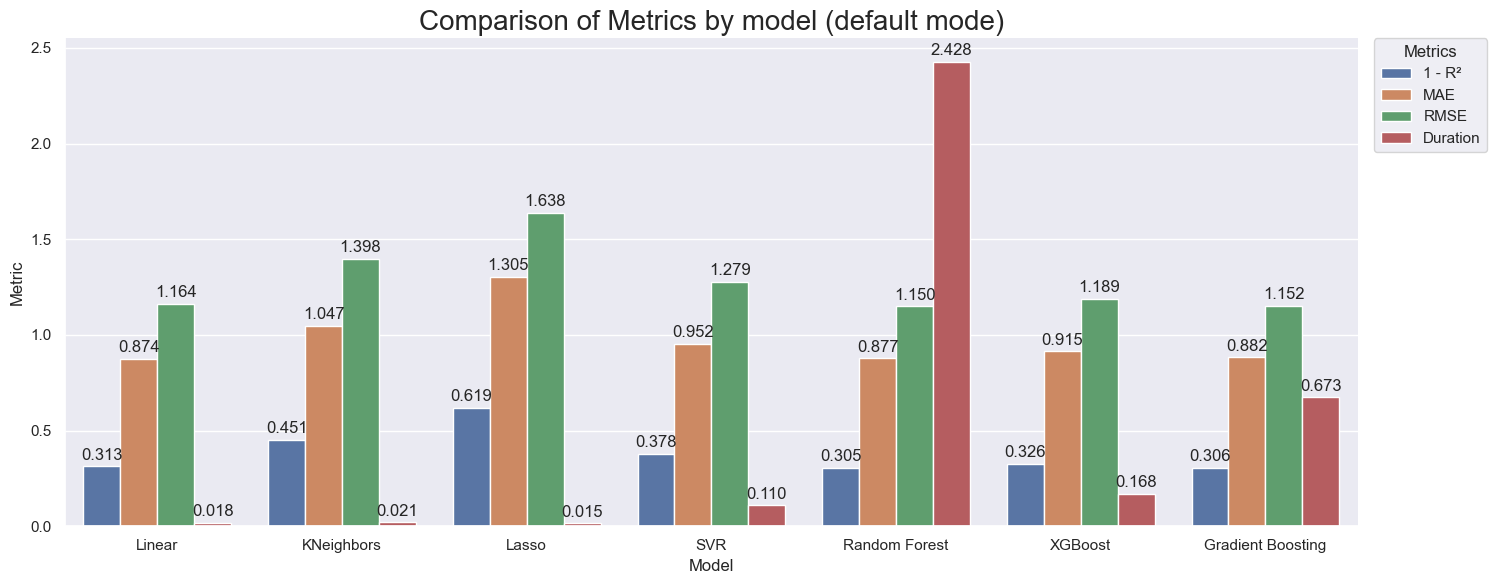

In [705]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel.png")
sns.despine(fig)

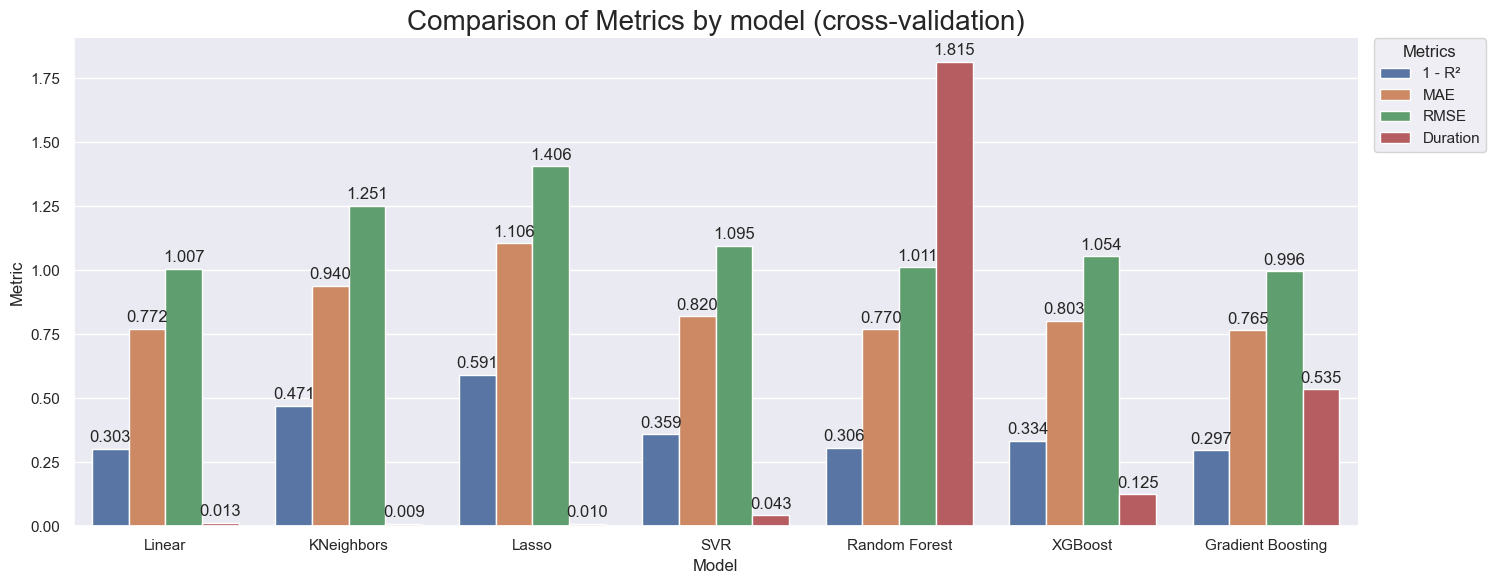

In [706]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt_cross, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (cross-validation)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetrics_crossByModel.png")
sns.despine(fig)

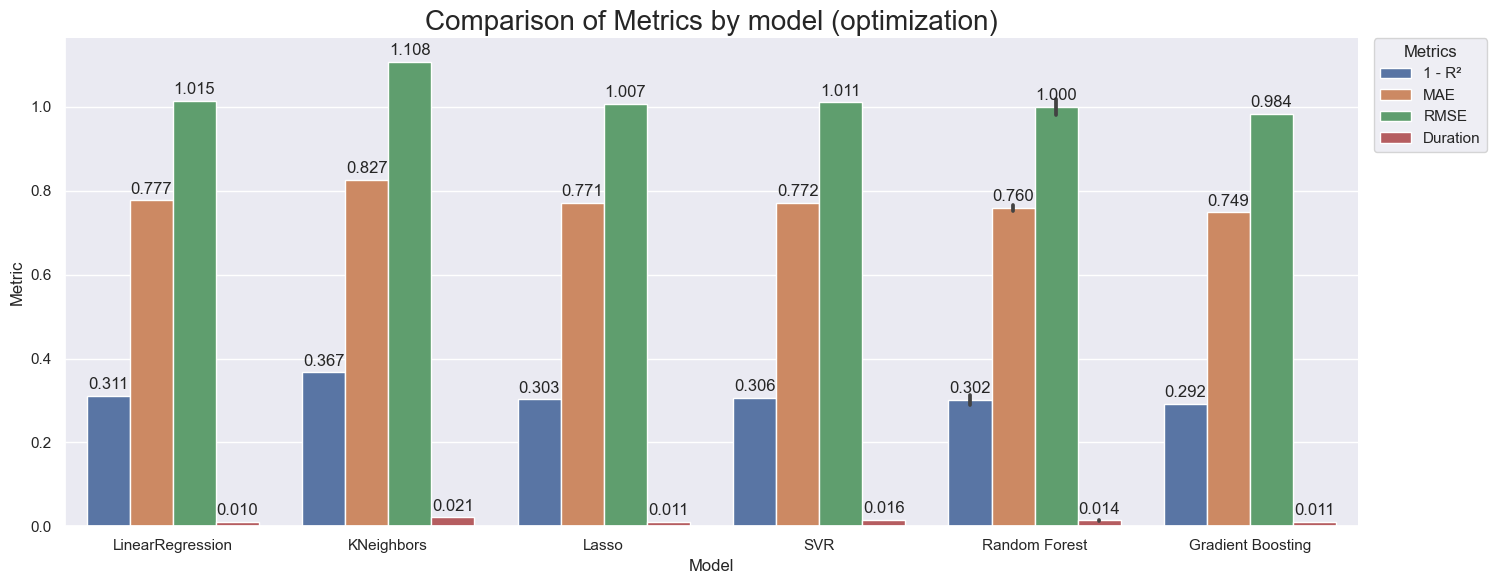

In [707]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_gsc, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model (optimization)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel-after-optimization.png")
sns.despine(fig)

<div class="alert alert-block alert-success">
    <b>Conclusions</b>
    <ul style="list-style-type: square;">
        <li><b>1-R2:</b> Gradient Boosting(0.005) </li>
        <li><b>MAE:</b> Gradient Boosting(0.053) </li>
        <li><b>RMSE:</b> Gradient Boosting(0.125) </li>
        <li><b>Duration:</b> Lasso(0.008) </li>
    </ul> 
    Based on the result, we are going to continue with <b>Gradient Boosting</b>
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">7.1. Comparing with baseline</h3>
</div>

<div class="alert alert-block alert-info">
    <p>Now, we are going to compare the result with a <b>dummy baseline</b> and the chance level</p>
    <p>First of all, we are going to run the cross-validate for the <b>Gradient Boosting Regressor</b>. </p>
</div>

In [708]:
cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

In [709]:
reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500, subsample=0.5))

result_regressor = cross_validate(reg, X_train, y_train, cv=cv, scoring=("neg_mean_absolute_error"), n_jobs=-2)

errors_regressor = pd.Series(-result_regressor["test_score"], name="Regressor error")

<div class="alert alert-block alert-info">
    <p>Now, we run the cross-validate for the Dummy Regressor</p>
</div>

In [710]:
dummy = DummyRegressor()

result_dummy = cross_validate(dummy, X_train, y_train, cv=cv, scoring=("neg_mean_absolute_error"), n_jobs=-2)

errors_dummy = pd.Series(-result_dummy["test_score"], name="Dummy error")

<div class="alert alert-block alert-info">
    Evaluating the generalization performance of the second baseline
</div>

In [711]:
reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

score, permutation_score, pvalue = permutation_test_score(reg, X_train, y_train, cv=cv, scoring=("neg_mean_absolute_error"), n_jobs=-2, n_permutations=30)

errors_permutation = pd.Series(-permutation_score, name="Permuted error")

<div class="alert alert-block alert-info">
    Plotting the resultats
</div>

In [712]:
final_errors = pd.concat([errors_regressor, errors_dummy, errors_permutation], axis=1)

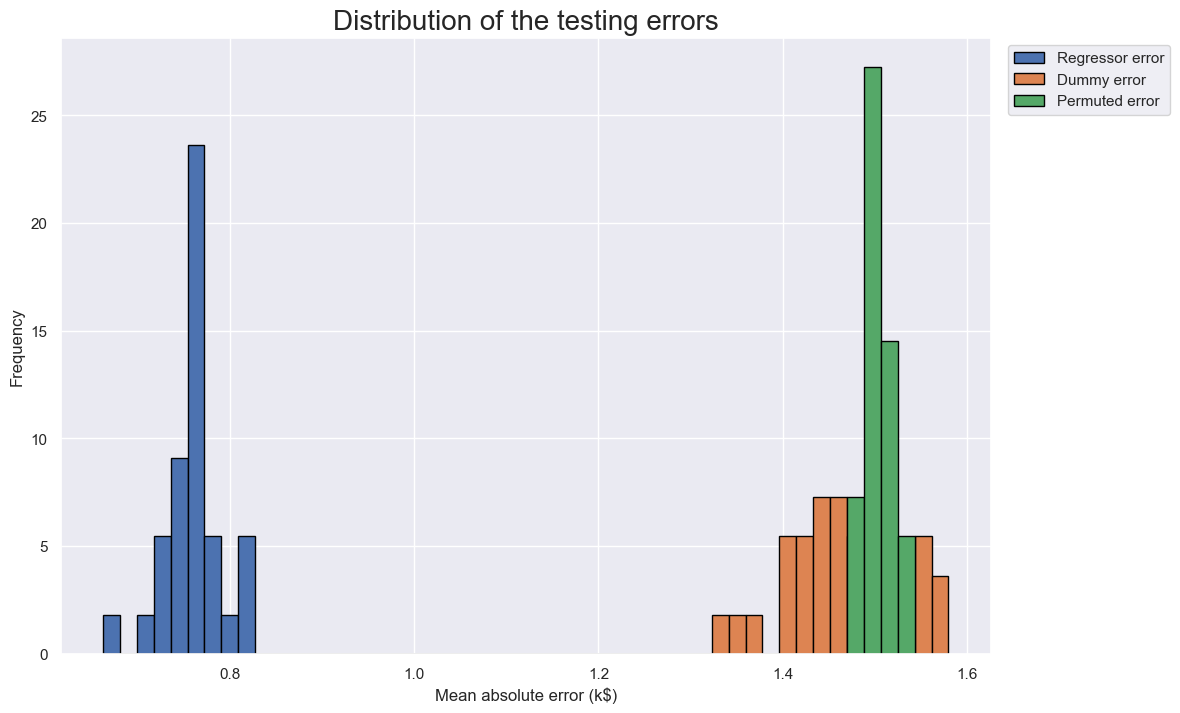

In [713]:
fig, ax1 = plt.subplots(figsize=(12, 8))
final_errors.plot.hist(bins=50, density=True, edgecolor="black", ax=ax1)
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
plt.title("Distribution of the testing errors", size=20)
plt.savefig("img/comparison-with-baselines.png")

<div class="alert alert-block alert-success">
    <p><b>Conclusions</b></p>
    We can see that the performance of Gradient Boosting it is better than the two baselines. 

</div>

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">8. Splitting data - TotalGHGEmissions</h2>
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.1. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [714]:
X = data_ind.drop(columns=["SiteEnergyUse(kBtu)", "TotalGHGEmissions", "ENERGYSTARScore"])

In [715]:
X.head()

,ZipCode,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFABuilding(s),BuildingAge,Dist_Harv,renamed_PropertyType,GFABuilding_mean,GFAFloor_mean,ExtsurfVol_Ratio,SteamUse_Ratio,Electricity_Ratio,NaturalGas_Ratio
0,98101,7,DOWNTOWN,1.0,12,88434.0,89,1568.261110,Hotel,88434.0,7369.50000,14.24131,0.27730,0.54606,0.17664
1,98101,7,DOWNTOWN,1.0,11,88502.0,20,1714.763280,Hotel,88502.0,8045.63636,13.63501,0.00000,0.38661,0.61339
2,98101,7,DOWNTOWN,1.0,41,759392.0,47,1423.556191,Hotel,759392.0,18521.75610,26.32396,0.29711,0.68231,0.02058
3,98101,7,DOWNTOWN,1.0,10,61320.0,90,1490.740477,Hotel,61320.0,6132.00000,13.00047,0.32591,0.40752,0.26657
4,98121,7,DOWNTOWN,1.0,18,113580.0,36,1316.309280,Hotel,113580.0,6310.00000,17.44197,0.00000,0.37880,0.62120


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [716]:
y_co2 = np.log2(data.loc[:,"TotalGHGEmissions"])
y_co2.head()

0     7.965669
1     8.208771
2    11.028790
3     8.162039
4     8.980168
Name: TotalGHGEmissions, dtype: float64

In [717]:
y_co2_values = y_co2.values
y_co2_values[:5]

array([ 7.96566886,  8.20877085, 11.02879014,  8.16203879,  8.98016815])

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.2. Train/Test split</h3>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>TotalGHGEmissions</b>
</div>

In [718]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

In [719]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("---------------------")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (1018, 15)
y_train: (1018,)
---------------------
X_test: (502, 15)
y_test: (502,)


<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.3. Predictions metrics</h3>
</div>

<div class="alert alert-block alert-info">
    We are going to make the prediction with the testing set to compare the result with the model in default mode
</div>

In [720]:
start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2 = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.23275
MAE = 0.843
RMSE = 1.109
Duration = 2.076


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [721]:
df_original_results_energy = pd.DataFrame({
    "Data" : ["Original", "Original", "Original", "Original"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY
})

df_original_results_energy

,Data,Metric,Value
0,Original,1 - R²,0.29237
1,Original,MAE,0.85800
2,Original,RMSE,1.12600
3,Original,Duration,2.40400


In [722]:
df_original_results_co2 = pd.DataFrame({
    "Data" : ["Original", "Original", "Original", "Original"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2
})

df_original_results_co2

,Data,Metric,Value
0,Original,1 - R²,0.23275
1,Original,MAE,0.84300
2,Original,RMSE,1.10900
3,Original,Duration,2.07600


<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.4. Gradient Boosting Validation curve</h3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Validation curve</b>, we are going to use a <b>range of estimators</b> to analyze the model through them
</div>

In [723]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

n_estimators = np.arange(start=50, stop=650, step=50)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the validacion curve</b> based on the best parameters
</div>

In [724]:
plot_validation_curve_by(reg, "Gradient Boosting (CO2)", "R2SCORE", X_train, y_train, param_name="gradientboostingregressor__n_estimators", param_range=n_estimators, param_name_short="Estimators", cv=kfold, enable=enable_pvc_8_4)

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.5. Gradient Boosting Learning curve</3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Learning curve</b>, we are going to use the <b>best  parameters</b> to analyze the model
</div>

In [725]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

<div class="alert alert-block alert-info">
    Plotting <b>the learning curve</b> based on the best parameters
</div>

In [726]:
plot_learning_curve(reg, "Gradient Boosting (CO2)", X_train, y_train, cv=kfold, enable=enable_plc_8_5)

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.6. Gradient Boosting predictions validations</h3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>predictions validations</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> and <b>predicting</b> values</b>
</div>

In [727]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

<div class="alert alert-block alert-info">
    Plotting <b>the Cross-Validated Predictions</b> based on the best parameters for <b>training data</b>
</div>

In [728]:
# Making the prediction using the testing data
plot_cross_val_predi(reg, "Gradient Boosting (CO2)", "TotalGHGEmissions", X_train, y_train, cv=kfold, enable=enable_pcvp_8_6)

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">8.7. Gradient Boosting Features Importance</h3>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [729]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Neighborhood',
                                                   'renamed_PropertyType',
                                                   'CouncilDistrictCode']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransfo...
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['NumberofFloors',
                                                   'NumberofBuildings',
                                                   'BuildingAge', 'Dist_Harv',
                                                   'Electricity_Ratio',
                                                   'SteamUse_Ratio',
                                                   'NaturalGas_Ratio',
                                                   'ExtsurfVol_Ratio'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.5))])

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [730]:
plot_features_importance(reg, "Gradient Boosting (CO2)", X_train, y_train, scoring="r2", enable=enable_pfi_8_7)

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">9. PCA - Predictions</h2>
</div>

<div class="alert alert-block alert-info">
    So far, we got the best result through Gradient Boosting. Now, we are going to test the same model with the PCA results
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.1. Importing and preparing files</h3>
</div>

In [731]:
data_pca = pd.read_csv(r"Dataset\df_PCA.csv")

In [732]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,SiteEnergyUse(kBtu),TotalGHGEmissions
0,2.109018,1.635670,3.445829,-0.335235,1.326122,1.365751,0.617946,22.784838,7.971429
1,1.661122,1.547600,0.013292,-0.295939,-0.348609,-0.931158,0.972728,22.999884,8.213639
2,1.516325,1.915612,3.449866,-0.305774,1.379897,1.460433,0.739981,22.695954,8.167067
3,2.727870,1.711383,0.609916,-0.487830,-0.369524,-1.210944,0.395962,23.756602,8.983022
4,1.173120,1.327941,1.243449,-0.092546,-0.058478,-1.338399,-0.609308,22.457336,7.468746


<div class="alert alert-block alert-info">
    It is not necessary to make any preprocessing on data
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.2. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [733]:
X = data_pca.drop(columns=["SiteEnergyUse(kBtu)", "TotalGHGEmissions"])

In [734]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.109018,1.635670,3.445829,-0.335235,1.326122,1.365751,0.617946
1,1.661122,1.547600,0.013292,-0.295939,-0.348609,-0.931158,0.972728
2,1.516325,1.915612,3.449866,-0.305774,1.379897,1.460433,0.739981
3,2.727870,1.711383,0.609916,-0.487830,-0.369524,-1.210944,0.395962
4,1.173120,1.327941,1.243449,-0.092546,-0.058478,-1.338399,-0.609308


In [735]:
y_energy = data_pca.loc[:,"SiteEnergyUse(kBtu)"]
y_energy.head()

0    22.784838
1    22.999884
2    22.695954
3    23.756602
4    22.457336
Name: SiteEnergyUse(kBtu), dtype: float64

In [736]:
y_co2 = data_pca.loc[:,"TotalGHGEmissions"]
y_co2.head()

0    7.971429
1    8.213639
2    8.167067
3    8.983022
4    7.468746
Name: TotalGHGEmissions, dtype: float64

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.3. Predictions metrics - SiteEnergyUse(kBtu)</h3>
</div>

In [737]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                subsample=search.best_params_.get("gradientboostingregressor__subsample"))

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_ENERGY_PCA = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.41989
MAE = 0.865
RMSE = 1.154
Duration = 2.109


<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">9.3. Predictions metrics - TotalGHGEmissions</h3>
</div>

In [738]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                subsample=search.best_params_.get("gradientboostingregressor__subsample"))

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2_PCA = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.32534
MAE = 0.846
RMSE = 1.103
Duration = 2.107


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [739]:
df_PCA_results_energy = pd.DataFrame({
    "Data" : ["PCA", "PCA", "PCA", "PCA"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY_PCA
})

df_PCA_results_energy

,Data,Metric,Value
0,PCA,1 - R²,0.41989
1,PCA,MAE,0.86500
2,PCA,RMSE,1.15400
3,PCA,Duration,2.10900


In [740]:
df_PCA_results_co2 = pd.DataFrame({
    "Data" : ["PCA", "PCA", "PCA", "PCA"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2_PCA
})

df_PCA_results_co2

,Data,Metric,Value
0,PCA,1 - R²,0.32534
1,PCA,MAE,0.84600
2,PCA,RMSE,1.10300
3,PCA,Duration,2.10700


<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">10. Reductions de features</h2>
</div>

<div class="alert alert-block alert-info">
    Now, we are going to reduce the features to make the predictions based on Gradient Boosting
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.1. Splitting dataset based on the features and targets</h3>
</div>

<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [741]:
# X = data.drop(columns=["SiteEnergyUse(kBtu)", "TotalGHGEmissions", "ENERGYSTARScore", "NumberofBuildings"])
X = data[['SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)', "PropertyGFABuilding(s)", "SiteEnergyUse(kBtu)","TotalGHGEmissions"]]

In [742]:
X.head()

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),PropertyGFABuilding(s),SiteEnergyUse(kBtu),TotalGHGEmissions
0,2003882.00,3946027.0,1276453.0,88434.0,7226362.00,249.98
1,0.00,3242851.0,5145082.0,88502.0,8387933.00,295.86
2,21566554.00,49526664.0,1493800.0,759392.0,72587018.00,2089.28
3,2214446.25,2768924.0,1811213.0,61320.0,6794583.25,286.43
4,0.00,5368607.0,8803998.0,113580.0,14172605.00,505.01


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [743]:
y_energy = np.log2(data.loc[:,"SiteEnergyUse(kBtu)"])
y_energy.head()

0    22.784838
1    22.999884
2    26.113208
3    22.695954
4    23.756602
Name: SiteEnergyUse(kBtu), dtype: float64

In [744]:
y_co2 = np.log2(data.loc[:,"TotalGHGEmissions"])
y_co2.head()

0     7.965669
1     8.208771
2    11.028790
3     8.162039
4     8.980168
Name: TotalGHGEmissions, dtype: float64

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.2. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
    Updating the data preprocessing based on the features selected
</div>

In [745]:
# BOOLEAN_FEATURES = ["NaturalGas"] # Features to be transformed into int
# CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"] # Features to be transformed with OneHotEncoder()
FEATURES_TO_LOG = ['Electricity(kBtu)', 'NaturalGas(kBtu)', "PropertyGFABuilding(s)"] # Features to be transformed into log2
NUMERICAL_FEATURES = ['SteamUse(kBtu)'] # Features to be treated considering numerical values

In [746]:
# boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

# categorical_pipeline = make_pipeline(OneHotEncoder(sparse=False, drop="first"))

log_transformation_pipeline = make_pipeline(KNNImputer(), FunctionTransformer(log_transformation))

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

In [747]:
preprocessor = make_column_transformer(
                (log_transformation_pipeline, FEATURES_TO_LOG),
                (numerical_pipeline, NUMERICAL_FEATURES)
    
)

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.3. Predictions metrics - SiteEnergyUse(kBtu)</h3>
</div>

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_ENERGY_REDUCED_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.00307
MAE = 0.067
RMSE = 0.112
Duration = 0.971


<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">10.4. Predictions metrics - TotalGHGEmissions</h3>
</div>

In [749]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()


reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2_REDUCED_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.00587
MAE = 0.089
RMSE = 0.176
Duration = 0.948


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [750]:
df_FEATURES_REDUCED_results_energy = pd.DataFrame({
    "Data" : ["Reduced", "Reduced", "Reduced", "Reduced"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY_REDUCED_FEATURES
})

df_FEATURES_REDUCED_results_energy

,Data,Metric,Value
0,Reduced,1 - R²,0.00307
1,Reduced,MAE,0.06700
2,Reduced,RMSE,0.11200
3,Reduced,Duration,0.97100


In [751]:
df_FEATURES_REDUCED_results_co2 = pd.DataFrame({
    "Data" : ["Reduced", "Reduced", "Reduced", "Reduced"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2_REDUCED_FEATURES
})

df_FEATURES_REDUCED_results_co2

,Data,Metric,Value
0,Reduced,1 - R²,0.00587
1,Reduced,MAE,0.08900
2,Reduced,RMSE,0.17600
3,Reduced,Duration,0.94800


<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">11. Comparison of predictions</h2>
</div>

In [752]:
df_final_energy = pd.concat([df_original_results_energy, df_PCA_results_energy, df_FEATURES_REDUCED_results_energy], axis=0)

In [753]:
df_final_co2 = pd.concat([df_original_results_co2, df_PCA_results_co2, df_FEATURES_REDUCED_results_co2], axis=0)

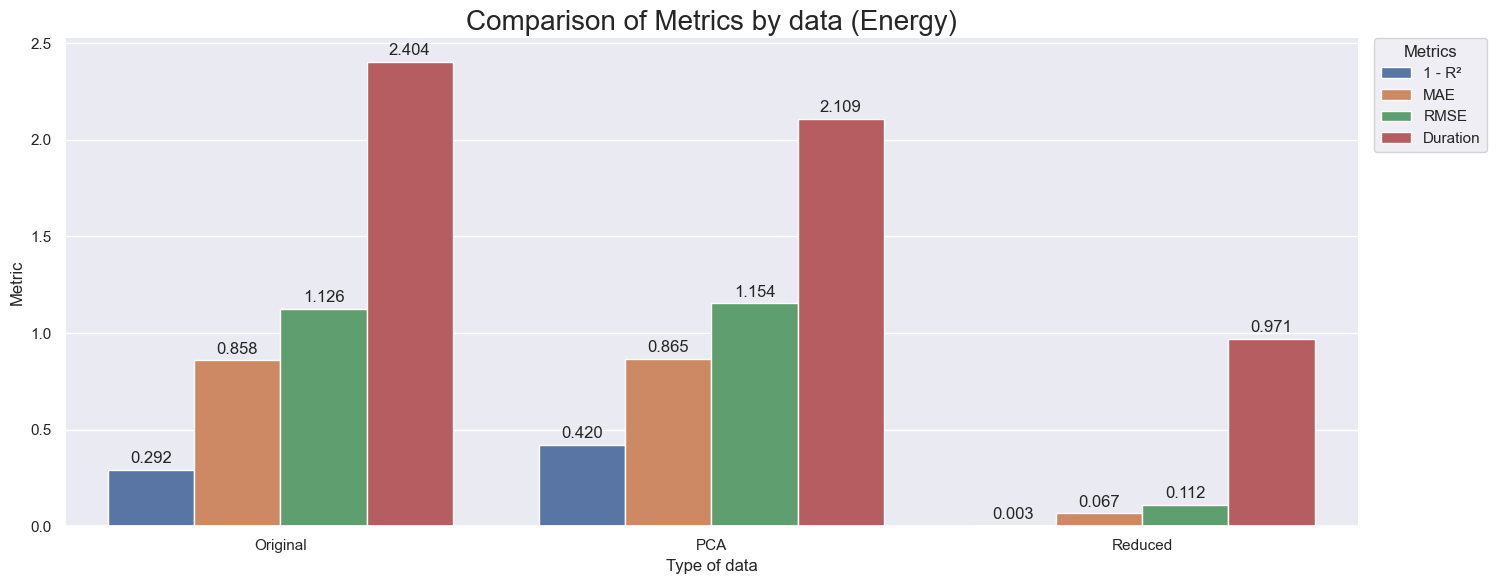

In [754]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Data", y="Value", hue="Metric", data=df_final_energy, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by data (Energy)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Type of data", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByData-Energy.png")
sns.despine(fig)

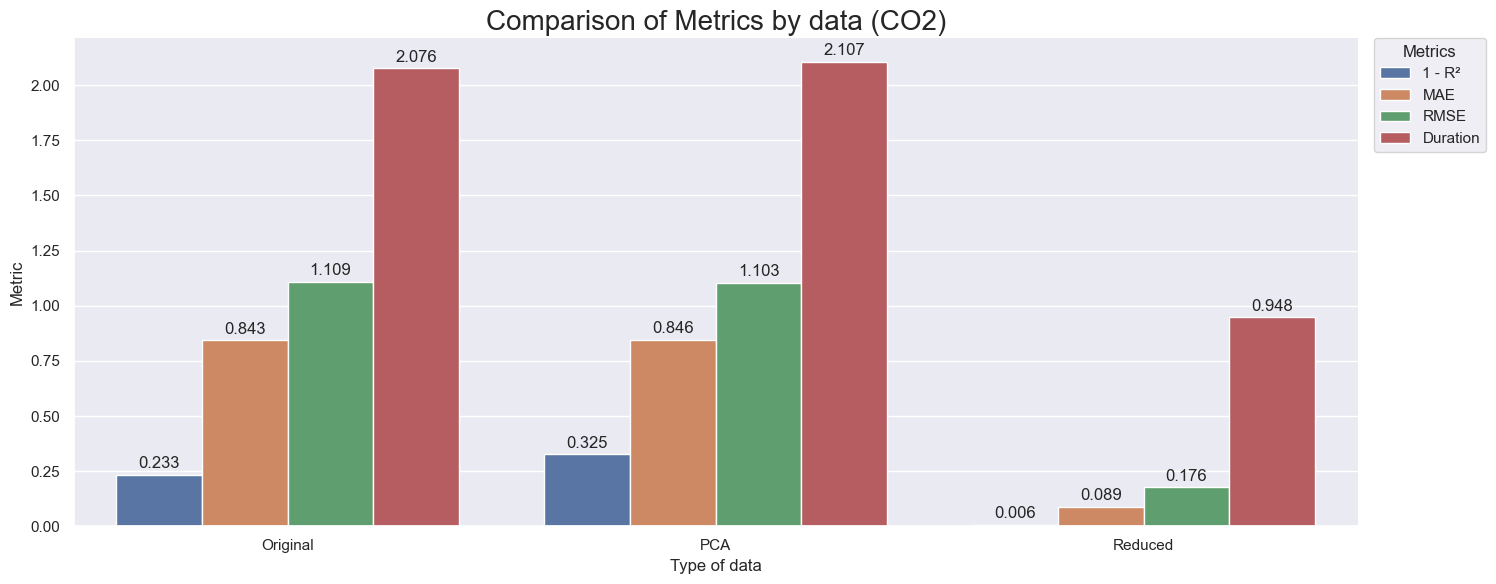

In [755]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Data", y="Value", hue="Metric", data=df_final_co2, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by data (CO2)", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Type of data", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByData-Co2.png")
sns.despine(fig)

<div style="background-color:  #229954 ;" >
    <h2 style="margin: auto; padding: 20px; color:#fff; ">12. Importance of ENERGYSTARScore in dataset reduced</h2>
</div>

<div class="alert alert-block alert-info">
    Now, we are going to identify the importance of ENERGYSTARScore for the predictions
</div>

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.1. Splitting dataset based on the features and targets</h3>
</div>

In [756]:
# df_energy_star_score = data.drop(columns=["NumberofBuildings", "PropertyGFATotal-binned", "SteamUse", "OtherFuelUse"])
df_energy_star_score = data[['SteamUse(kBtu)','Electricity(kBtu)', 'NaturalGas(kBtu)', "SiteEnergyUse(kBtu)","TotalGHGEmissions", 'ENERGYSTARScore']]

In [757]:
df_analysis(df_energy_star_score, "df_energy_star_score", type_analysis="complete")


Analysis of df_energy_star_score dataset
--------------------------------------------------------------------
- Dataset shape:                  1520 rows and 6 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 71.4 KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,SteamUse(kBtu),float64,1520,109,0,0.00000,491522.47999,0.00000,0.00000,0.00000,0.00000,134943456.00000,5339714.83789
1,Electricity(kBtu),float64,1520,1519,0,0.00000,5741296.05424,0.00000,735117.50000,1748791.50000,5264935.25000,274532495.00000,13830969.69907
2,NaturalGas(kBtu),float64,1520,1087,0,0.00000,2065470.20412,0.00000,0.00000,494758.50000,1536392.25000,297909000.00000,9796765.11385
3,SiteEnergyUse(kBtu),float64,1520,1520,0,0.00000,8298288.73835,57133.00000,1253389.75000,2719050.50000,7277572.25000,448385283.00000,22416937.50287
4,TotalGHGEmissions,float64,1520,1463,0,0.00000,187.66162,0.40000,20.59500,50.01500,147.03500,16870.98000,733.82079
5,ENERGYSTARScore,float64,1520,101,0,0.00000,41.26579,0.00000,0.00000,41.00000,79.00000,100.00000,38.20850


<div class="alert alert-block alert-info">
    Here, we have a problem, there are 514 missing-values in <b>ENERGYSTARScore</b>. So, we are going to delete them to see how many samples left
</div>

In [758]:
df_energy_star_score.loc[:,'ENERGYSTARScore'] = df_energy_star_score["ENERGYSTARScore"].replace(0, np.nan)

In [759]:
df_energy_star_score = pd.DataFrame(df_energy_star_score[df_energy_star_score["ENERGYSTARScore"].notnull()]).reset_index(drop=True)

In [760]:
df_analysis(df_energy_star_score, "df_energy_star_score", type_analysis="complete")


Analysis of df_energy_star_score dataset
--------------------------------------------------------------------
- Dataset shape:                  986 rows and 6 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 46.3 KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,SteamUse(kBtu),float64,986,75,0,0.00000,605453.70468,0.00000,0.00000,0.00000,0.00000,134943456.00000,6469180.51446
1,Electricity(kBtu),float64,986,985,0,0.00000,6297603.21501,6138.00000,796166.25000,1886093.50000,5659324.25000,274532495.00000,15792392.62052
2,NaturalGas(kBtu),float64,986,681,0,0.00000,1996783.61359,0.00000,0.00000,410188.50000,1397222.50000,297909000.00000,11367519.77992
3,SiteEnergyUse(kBtu),float64,986,986,0,0.00000,8899840.53328,79712.00000,1269487.00000,2815681.00000,7725744.50000,448385283.00000,25943171.84336
4,TotalGHGEmissions,float64,986,960,0,0.00000,196.68591,0.81000,20.34000,49.86000,145.03000,16870.98000,866.37266
5,ENERGYSTARScore,float64,986,100,0,0.00000,63.61460,1.00000,44.00000,71.00000,88.00000,100.00000,28.77826


<div class="alert alert-block alert-info">
    986 samples remained. So, let's go to Split dataset based on the features and targets
</div>

In [761]:
X = df_energy_star_score.drop(columns=["SiteEnergyUse(kBtu)", "TotalGHGEmissions"])

In [762]:
X.head()

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ENERGYSTARScore
0,2003882.00,3946027.0,1276453.0,60.0
1,0.00,3242851.0,5145082.0,61.0
2,21566554.00,49526664.0,1493800.0,43.0
3,2214446.25,2768924.0,1811213.0,56.0
4,0.00,5368607.0,8803998.0,75.0


<div class="alert alert-block alert-info">
    Based on the Exploratory Data Analysis realized, we are going to transform to log2 the target variable
</div>

In [763]:
y_energy = np.log2(df_energy_star_score.loc[:,"SiteEnergyUse(kBtu)"])
y_energy.head()

0    22.784838
1    22.999884
2    26.113208
3    22.695954
4    23.756602
Name: SiteEnergyUse(kBtu), dtype: float64

In [764]:
y_co2 = np.log2(df_energy_star_score.loc[:,"TotalGHGEmissions"])
y_co2.head()

0     7.965669
1     8.208771
2    11.028790
3     8.162039
4     8.980168
Name: TotalGHGEmissions, dtype: float64

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.2. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
    Updating the data preprocessing based on the features selected
</div>

In [765]:
# BOOLEAN_FEATURES = ["NaturalGas"] # Features to be transformed into int
# CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"] # Features to be transformed with OneHotEncoder()
FEATURES_TO_LOG = ['Electricity(kBtu)', 'NaturalGas(kBtu)'] #, "PropertyGFABuilding(s)"] # Features to be transformed into log2
NUMERICAL_FEATURES = ['SteamUse(kBtu)', "ENERGYSTARScore"] # Features to be treated considering numerical values

In [766]:
# boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

# categorical_pipeline = make_pipeline(OneHotEncoder(sparse=False, drop="first"))

log_transformation_pipeline = make_pipeline(KNNImputer(), FunctionTransformer(log_transformation))

numerical_pipeline = make_pipeline(KNNImputer(), StandardScaler())

In [767]:
preprocessor = make_column_transformer(
                (log_transformation_pipeline, FEATURES_TO_LOG), 
                (numerical_pipeline, NUMERICAL_FEATURES)
)

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.4. Predictions - SiteEnergyUse(kBtu)</h3>
</div>

In [768]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.00674
MAE = 0.081
RMSE = 0.159
Duration = 0.607


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [769]:
df_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES = pd.DataFrame({
    "Target" : ["Energy", "Energy", "Energy", "Energy"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES
})

df_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES

,Target,Metric,Value
0,Energy,1 - R²,0.00674
1,Energy,MAE,0.08100
2,Energy,RMSE,0.15900
3,Energy,Duration,0.60700


<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.4.1 Features Importance - SiteEnergyUse(kBtu)</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [770]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transformation at 0x000001440D1127A0>))]),
                                                  ['Electricity(kBtu)',
                                                   'NaturalGas(kBtu)']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SteamUse(kBtu)',
                                                   'ENERGYSTARScore'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.5))])

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [771]:
plot_features_importance(reg, "Gradient Boosting (energy)", X_train, y_train, scoring="r2", enable=enable_pfi_12_4)

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.5. Predictions - TotalGHGEmissions</h3>
</div>

In [772]:
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.33, random_state=42)

start_time_model = timeit.default_timer()


reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

# Making the prediction using the testing data
y_pred = reg.predict(X_test)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

# Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
R2SCORE = round((1 - r2_score(y_test, y_pred)), 5)
    
# Calculating the Mean absolute error (The best value is 0.0)
MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
# Calculating Root Mean Square Error for each model (The best value is 0.0)
RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)

LIST_CO2_REDUCED_ENERGYSTARSCORE_FEATURES = [R2SCORE, MAE, RMSE, end_time_model]

print("R2 =".translate(SUP), R2SCORE)
print("MAE =", MAE)
print("RMSE =", RMSE)
print("Duration =", end_time_model)

R² = 0.01009
MAE = 0.099
RMSE = 0.219
Duration = 0.611


<div class="alert alert-block alert-info">
    Adding results of predictions to compare before with others predictions
</div>

In [773]:
df_CO2_REDUCED_ENERGYSTARSCORE_FEATURES = pd.DataFrame({
    "Target" : ["CO2", "CO2", "CO2", "CO2"],
    "Metric" : ["1 - " + "R2".translate(SUP), "MAE", "RMSE", "Duration"],
    "Value" : LIST_CO2_REDUCED_ENERGYSTARSCORE_FEATURES
})

df_CO2_REDUCED_ENERGYSTARSCORE_FEATURES

,Target,Metric,Value
0,CO2,1 - R²,0.01009
1,CO2,MAE,0.09900
2,CO2,RMSE,0.21900
3,CO2,Duration,0.61100


<div style="background-color:  #52be80;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">12.5.1 Features Importance - TotalGHGEmissions</h4>
</div>

<div class="alert alert-block alert-info">
    To plot the <b>Features Importance</b>, we are going to use the <b>best  parameters</b> to analyze the model after <b>fitting</b> values</b>
</div>

In [774]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

reg = make_pipeline(preprocessor, GradientBoostingRegressor(learning_rate=search.best_params_.get("gradientboostingregressor__learning_rate"),
                                                            max_depth=search.best_params_.get("gradientboostingregressor__max_depth"),
                                                            n_estimators=search.best_params_.get("gradientboostingregressor__n_estimators"),
                                                            subsample=search.best_params_.get("gradientboostingregressor__subsample"))
                   )

reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transformation at 0x000001440D1127A0>))]),
                                                  ['Electricity(kBtu)',
                                                   'NaturalGas(kBtu)']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['SteamUse(kBtu)',
                                                   'ENERGYSTARScore'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.01, max_depth=4,
                                           n_estimators=500, subsample=0.5))])

<div class="alert alert-block alert-info">
    Plotting <b>the Features Importance</b> based on the best parameters
</div>

In [775]:
plot_features_importance(reg, "Gradient Boosting (CO2)", X_train, y_train, scoring="r2", enable=enable_pfi_12_5)

<div style="background-color:  #52be80;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">12.6. Plotting the final results</h3>
</div>

In [776]:
df_final_reduced_energystarscore = pd.concat([df_ENERGY_REDUCED_ENERGYSTARSCORE_FEATURES, df_CO2_REDUCED_ENERGYSTARSCORE_FEATURES], axis=0)

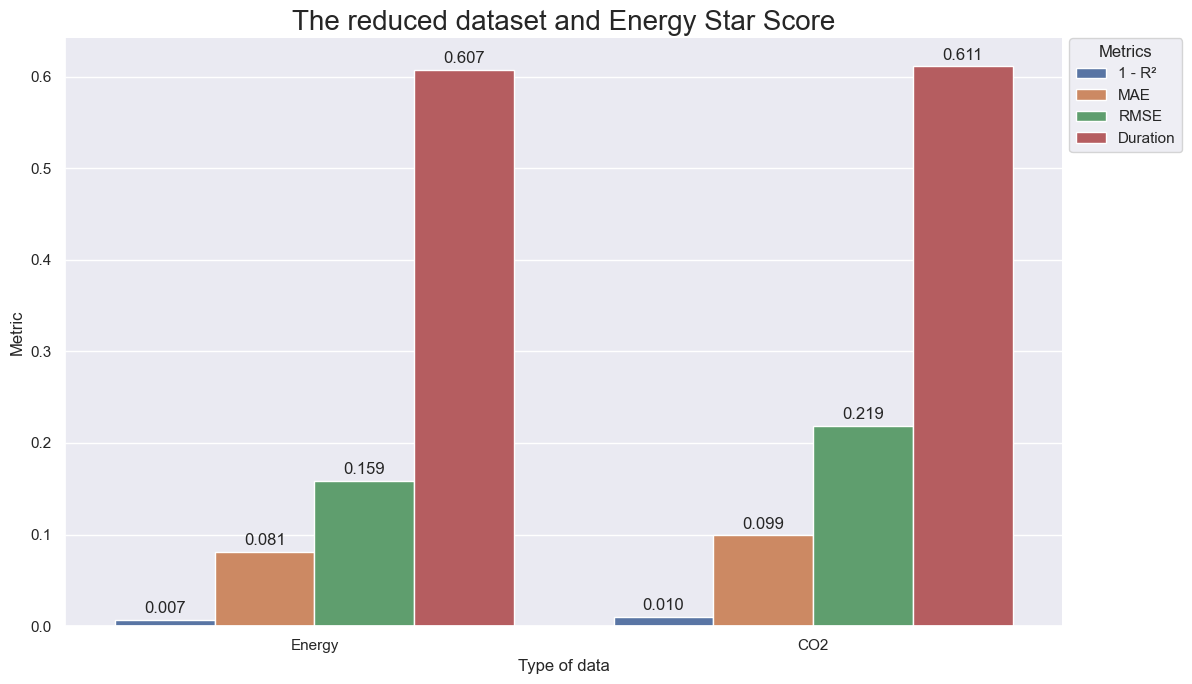

In [777]:
fig, ax1 = plt.subplots(figsize=(12, 7))
plot = sns.barplot(x="Target", y="Value", hue="Metric", data=df_final_reduced_energystarscore, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("The reduced dataset and Energy Star Score", size=20)
plt.legend(bbox_to_anchor=(1.12, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Type of data", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/EnergyStarScore-reduced-dataset.png")
sns.despine(fig)

<div class="alert alert-block alert-info">
    Here, we can conclude that the importance of the Energy Star Score in the model
</div>